In [2043]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
from sklearn.svm import SVR

In [2045]:
df=pd.read_csv('Downloads/Processed_Flipdata - Processed_Flipdata.csv')
df

Unnamed: 0                  Model          Colour  Memory  RAM  Battery_  \
0             0        Infinix SMART 7     Night Black      64    4      6000   
1             1        Infinix SMART 7      Azure Blue      64    4      6000   
2             2           MOTOROLA G32    Mineral Gray     128    8      5000   
3             3               POCO C50      Royal Blue      32    2      5000   
4             4        Infinix HOT 30i        Marigold     128    8      5000   
..          ...                    ...             ...     ...  ...       ...   
536         637  SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
537         638               LAVA Z21            Cyan      32    2      3100   
538         639         Tecno Spark 8T  Turquoise Cyan      64    4      5000   
539         641  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
540         642               OPPO A77        Sky Blue     128    4      5000   

    Rear Camera Front Camera  AI Lens  Mobile Height  \
0          13MP          5MP        1          16.76   
1          13MP          5MP        1          16.76   
2          50MP         16MP        0          16.64   
3           8MP          5MP        0          16.56   
4          50MP          5MP        1          16.76   
..          ...          ...      ...            ...   
536        50MP         12MP        0          15.49   
537         5MP          2MP        0          12.70   
538        50MP          8MP        0          16.76   
539        50MP         32MP        0          16.26   
540        50MP          8MP        0          16.66   

                      Processor_   Prize  
0     Unisoc Spreadtrum SC9863A1   7,299  
1     Unisoc Spreadtrum SC9863A1   7,299  
2        Qualcomm Snapdragon 680  11,999  
3             Mediatek Helio A22   5,649  
4                            G37   8,999  
..                           ...     ...  
536  Qualcomm Snapdragon 8 Gen 2  79,999  
537                    Octa Core   5,998  
538           MediaTek Helio G35   9,990  
539      Exynos 1380, Octa Core   38,999  
540           Mediatek Helio G35  15,999  

[541 rows x 12 columns]

In [2047]:
df.head()

Unnamed: 0            Model        Colour  Memory  RAM  Battery_  \
0           0  Infinix SMART 7   Night Black      64    4      6000   
1           1  Infinix SMART 7    Azure Blue      64    4      6000   
2           2     MOTOROLA G32  Mineral Gray     128    8      5000   
3           3         POCO C50    Royal Blue      32    2      5000   
4           4  Infinix HOT 30i      Marigold     128    8      5000   

  Rear Camera Front Camera  AI Lens  Mobile Height  \
0        13MP          5MP        1          16.76   
1        13MP          5MP        1          16.76   
2        50MP         16MP        0          16.64   
3         8MP          5MP        0          16.56   
4        50MP          5MP        1          16.76   

                   Processor_   Prize  
0  Unisoc Spreadtrum SC9863A1   7,299  
1  Unisoc Spreadtrum SC9863A1   7,299  
2     Qualcomm Snapdragon 680  11,999  
3          Mediatek Helio A22   5,649  
4                         G37   8,999

In [2049]:
df.tail()

Unnamed: 0                  Model          Colour  Memory  RAM  Battery_  \
536         637  SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
537         638               LAVA Z21            Cyan      32    2      3100   
538         639         Tecno Spark 8T  Turquoise Cyan      64    4      5000   
539         641  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
540         642               OPPO A77        Sky Blue     128    4      5000   

    Rear Camera Front Camera  AI Lens  Mobile Height  \
536        50MP         12MP        0          15.49   
537         5MP          2MP        0          12.70   
538        50MP          8MP        0          16.76   
539        50MP         32MP        0          16.26   
540        50MP          8MP        0          16.66   

                      Processor_   Prize  
536  Qualcomm Snapdragon 8 Gen 2  79,999  
537                    Octa Core   5,998  
538           MediaTek Helio G35   9,990  
539      Exynos 1380, Octa Core   38,999  
540           Mediatek Helio G35  15,999

In [2051]:
df.shape

(541, 12)

In [2053]:
df.describe().T

count         mean         std    min      25%      50%  \
Unnamed: 0     541.0   289.711645  182.359185    0.0   135.00   273.00   
Memory         541.0   110.550832   60.600694   16.0    64.00   128.00   
RAM            541.0     5.397412    1.984923    2.0     4.00     6.00   
Battery_       541.0  4871.587800  780.148862  800.0  5000.00  5000.00   
AI Lens        541.0     0.062847    0.242911    0.0     0.00     0.00   
Mobile Height  541.0    16.431201    2.523553    4.5    16.51    16.71   

                   75%      max  
Unnamed: 0      434.00   642.00  
Memory          128.00   256.00  
RAM               8.00     8.00  
Battery_       5000.00  7000.00  
AI Lens           0.00     1.00  
Mobile Height    16.94    41.94

In [2055]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


In [2057]:
df.duplicated().sum()

0

In [2059]:
df.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [2061]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

Model        Colour  Memory  RAM  Battery_ Rear Camera  \
0  Infinix SMART 7   Night Black      64    4      6000        13MP   
1  Infinix SMART 7    Azure Blue      64    4      6000        13MP   
2     MOTOROLA G32  Mineral Gray     128    8      5000        50MP   
3         POCO C50    Royal Blue      32    2      5000         8MP   
4  Infinix HOT 30i      Marigold     128    8      5000        50MP   

  Front Camera  AI Lens  Mobile Height                  Processor_   Prize  
0          5MP        1          16.76  Unisoc Spreadtrum SC9863A1   7,299  
1          5MP        1          16.76  Unisoc Spreadtrum SC9863A1   7,299  
2         16MP        0          16.64     Qualcomm Snapdragon 680  11,999  
3          5MP        0          16.56          Mediatek Helio A22   5,649  
4          5MP        1          16.76                         G37   8,999

In [2062]:
df['Rear Camera']=df['Rear Camera'].str.replace('MP','')
df.head()

Model        Colour  Memory  RAM  Battery_ Rear Camera  \
0  Infinix SMART 7   Night Black      64    4      6000          13   
1  Infinix SMART 7    Azure Blue      64    4      6000          13   
2     MOTOROLA G32  Mineral Gray     128    8      5000          50   
3         POCO C50    Royal Blue      32    2      5000           8   
4  Infinix HOT 30i      Marigold     128    8      5000          50   

  Front Camera  AI Lens  Mobile Height                  Processor_   Prize  
0          5MP        1          16.76  Unisoc Spreadtrum SC9863A1   7,299  
1          5MP        1          16.76  Unisoc Spreadtrum SC9863A1   7,299  
2         16MP        0          16.64     Qualcomm Snapdragon 680  11,999  
3          5MP        0          16.56          Mediatek Helio A22   5,649  
4          5MP        1          16.76                         G37   8,999

In [2063]:
df['Front Camera']=df['Front Camera'].str.replace('MP','')
df.head()

Model        Colour  Memory  RAM  Battery_ Rear Camera  \
0  Infinix SMART 7   Night Black      64    4      6000          13   
1  Infinix SMART 7    Azure Blue      64    4      6000          13   
2     MOTOROLA G32  Mineral Gray     128    8      5000          50   
3         POCO C50    Royal Blue      32    2      5000           8   
4  Infinix HOT 30i      Marigold     128    8      5000          50   

  Front Camera  AI Lens  Mobile Height                  Processor_   Prize  
0            5        1          16.76  Unisoc Spreadtrum SC9863A1   7,299  
1            5        1          16.76  Unisoc Spreadtrum SC9863A1   7,299  
2           16        0          16.64     Qualcomm Snapdragon 680  11,999  
3            5        0          16.56          Mediatek Helio A22   5,649  
4            5        1          16.76                         G37   8,999

In [2064]:
df['Rear Camera']=df['Rear Camera'].astype('int64')
df['Front Camera']=df['Front Camera'].astype('int64')

In [2065]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    int64  
 6   Front Camera   541 non-null    int64  
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 46.6+ KB


In [2066]:
df.rename(columns={'Battery_':'mAH of Battery','Rear Camera':'Rear Camera(In MP)','Front Camera':'Front Camera(In MP)','Processor_':'Processor','Prize':'Price'},inplace=True)
df.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'mAH of Battery',
       'Rear Camera(In MP)', 'Front Camera(In MP)', 'AI Lens', 'Mobile Height',
       'Processor', 'Price'],
      dtype='object')

In [2073]:
df.head()

Model        Colour  Memory  RAM  mAH of Battery  \
0  Infinix SMART 7   Night Black      64    4            6000   
1  Infinix SMART 7    Azure Blue      64    4            6000   
2     MOTOROLA G32  Mineral Gray     128    8            5000   
3         POCO C50    Royal Blue      32    2            5000   
4  Infinix HOT 30i      Marigold     128    8            5000   

   Rear Camera(In MP)  Front Camera(In MP)  AI Lens  Mobile Height  \
0                  13                    5        1          16.76   
1                  13                    5        1          16.76   
2                  50                   16        0          16.64   
3                   8                    5        0          16.56   
4                  50                    5        1          16.76   

                    Processor   Price  
0  Unisoc Spreadtrum SC9863A1   7,299  
1  Unisoc Spreadtrum SC9863A1   7,299  
2     Qualcomm Snapdragon 680  11,999  
3          Mediatek Helio A22   5,649  
4                         G37   8,999

In [2075]:
df['Price'] = pd.to_numeric(df['Price'].astype(str).str.replace(',', '', regex=False), errors='coerce')
df.head()

Model        Colour  Memory  RAM  mAH of Battery  \
0  Infinix SMART 7   Night Black      64    4            6000   
1  Infinix SMART 7    Azure Blue      64    4            6000   
2     MOTOROLA G32  Mineral Gray     128    8            5000   
3         POCO C50    Royal Blue      32    2            5000   
4  Infinix HOT 30i      Marigold     128    8            5000   

   Rear Camera(In MP)  Front Camera(In MP)  AI Lens  Mobile Height  \
0                  13                    5        1          16.76   
1                  13                    5        1          16.76   
2                  50                   16        0          16.64   
3                   8                    5        0          16.56   
4                  50                    5        1          16.76   

                    Processor  Price  
0  Unisoc Spreadtrum SC9863A1   7299  
1  Unisoc Spreadtrum SC9863A1   7299  
2     Qualcomm Snapdragon 680  11999  
3          Mediatek Helio A22   5649  
4                         G37   8999

In [2077]:
df.shape

(541, 11)

# EDA
# Univariate Analysis

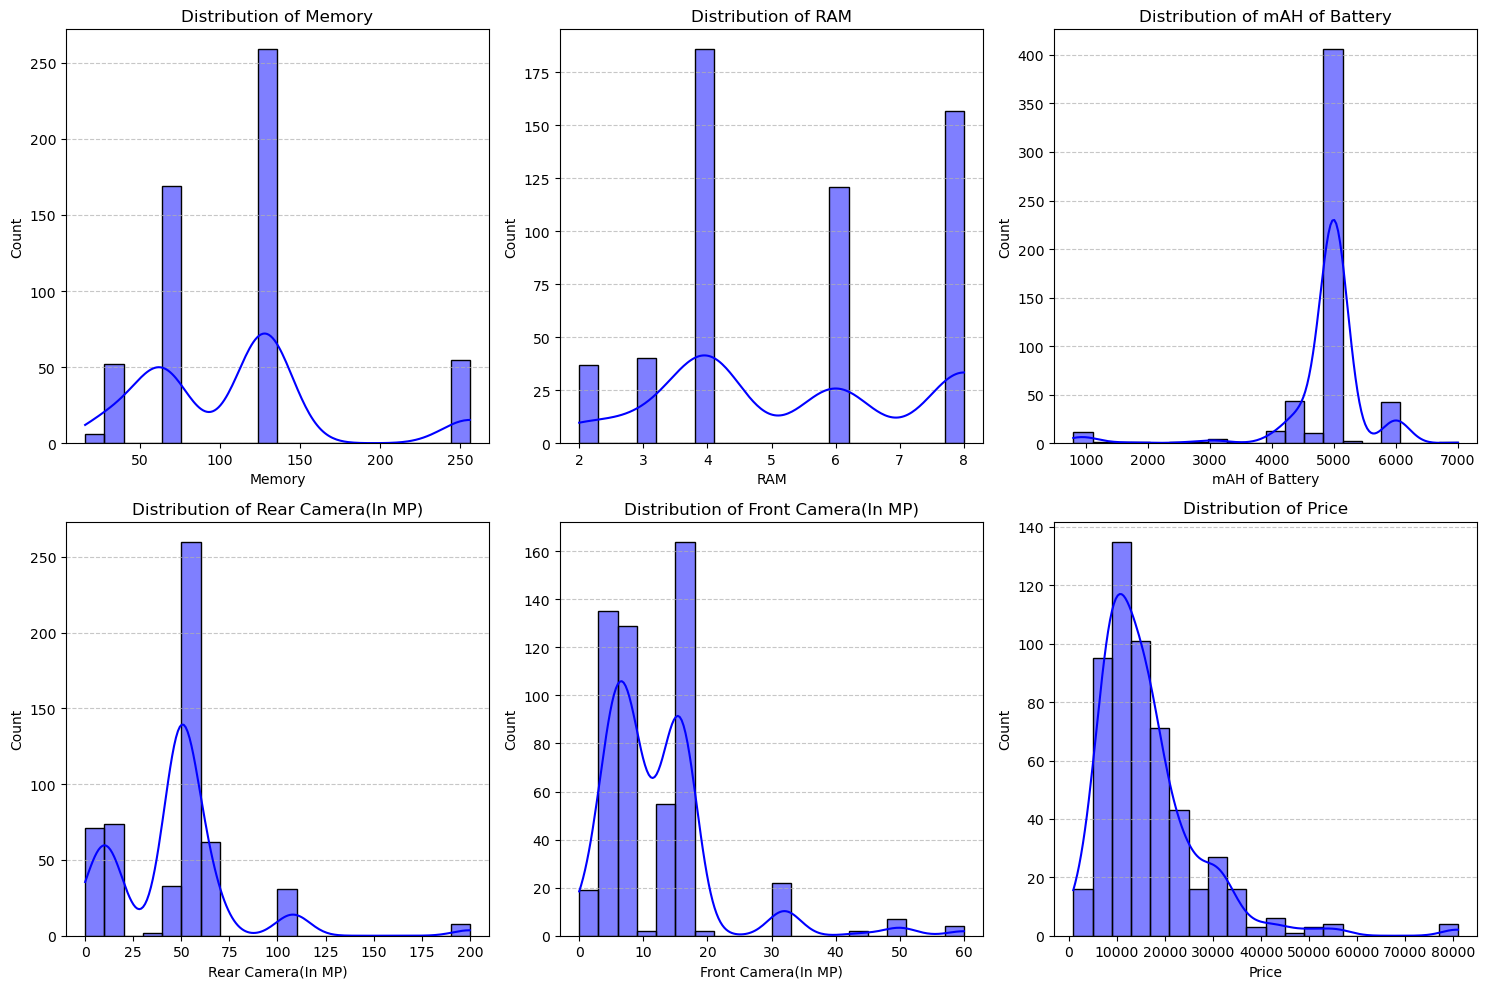

In [2080]:
# numerical features
numerical_features = ["Memory", "RAM", "mAH of Battery", "Rear Camera(In MP)", "Front Camera(In MP)", "Price"]

# subplots with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjust figure size

# easy iteration
axes = axes.flatten()


for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], bins=20, kde=True, color="blue", ax=axes[i])  # Histogram with KDE
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

# Remove empty subplots (if any)
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


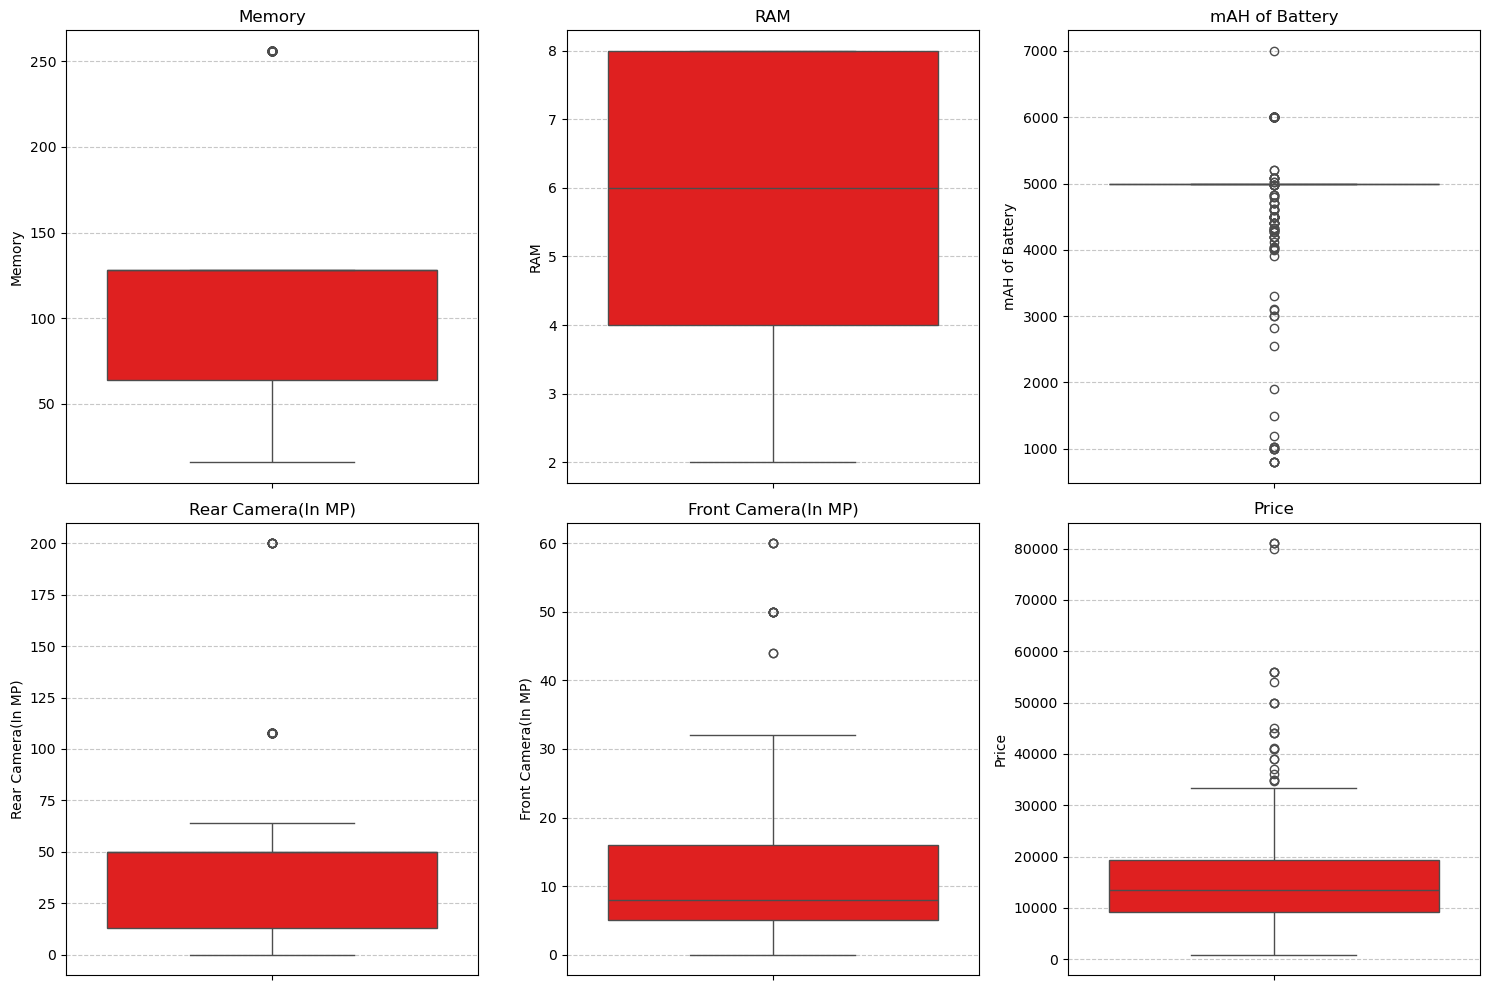

In [2081]:
# numerical features
numerical_features = ["Memory", "RAM", "mAH of Battery", "Rear Camera(In MP)", "Front Camera(In MP)", "Price"]

# subplots with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjust size

# easy iteration
axes = axes.flatten()


for i, feature in enumerate(numerical_features):
    sns.boxplot(y=df[feature], color="red", ax=axes[i])  # Boxplot on each subplot
    axes[i].set_title(f"{feature}")  # Set title
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)  # Add grid

# Remove empty subplots (if any)
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()


In [2083]:
# BARPLOT (TOP 10 Models vs Average price)

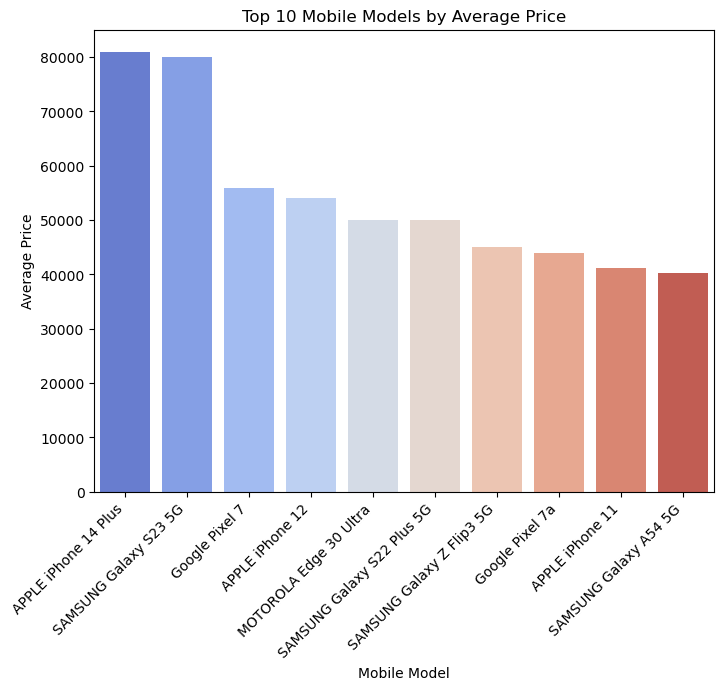

In [2084]:
# Group by Model and calculate the average price
top_10_models = df.groupby("Model")["Price"].mean().nlargest(10)  # Get top 10 highest priced models

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=top_10_models.index, y=top_10_models.values, palette="coolwarm")
plt.xticks(rotation=45, ha="right")  # Rotate model names for better visibility
plt.title("Top 10 Mobile Models by Average Price")
plt.xlabel("Mobile Model")
plt.ylabel("Average Price")
plt.grid(False)
plt.show()

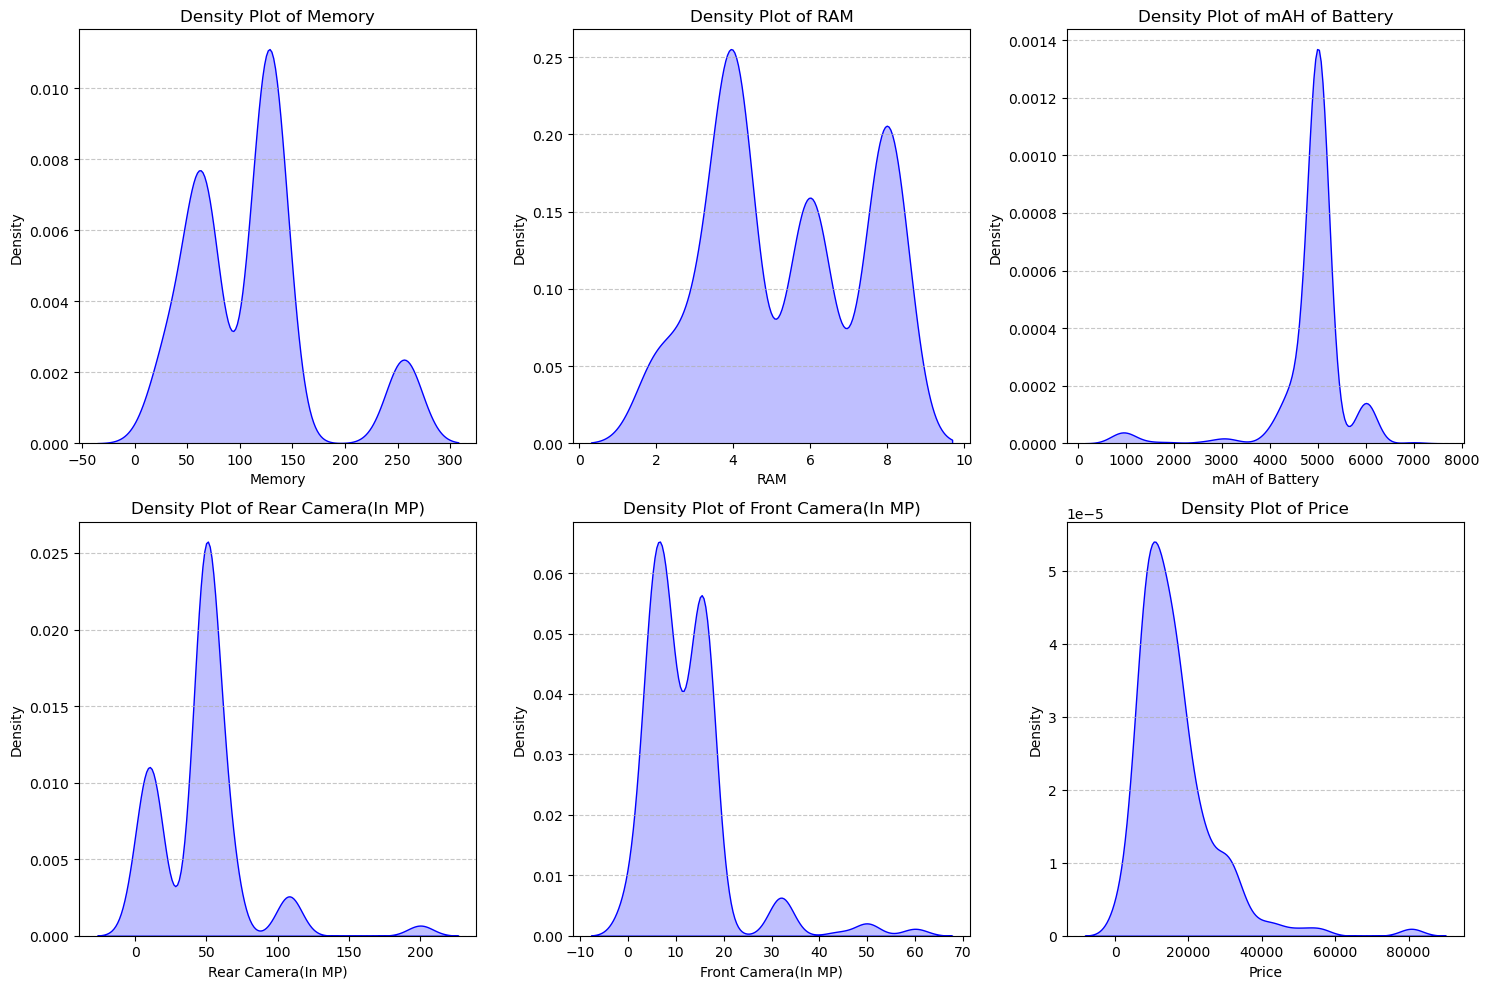

In [2085]:
# numerical features
numerical_features = ["Memory", "RAM", "mAH of Battery", "Rear Camera(In MP)", "Front Camera(In MP)", "Price"]

# subplots with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjust size for readability

# easy iteration
axes = axes.flatten()


for i, feature in enumerate(numerical_features):
    sns.kdeplot(df[feature], fill=True, color="blue", ax=axes[i])  # KDE Plot with fill
    axes[i].set_title(f"Density Plot of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Density")
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

# Remove empty subplots (if any)
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()


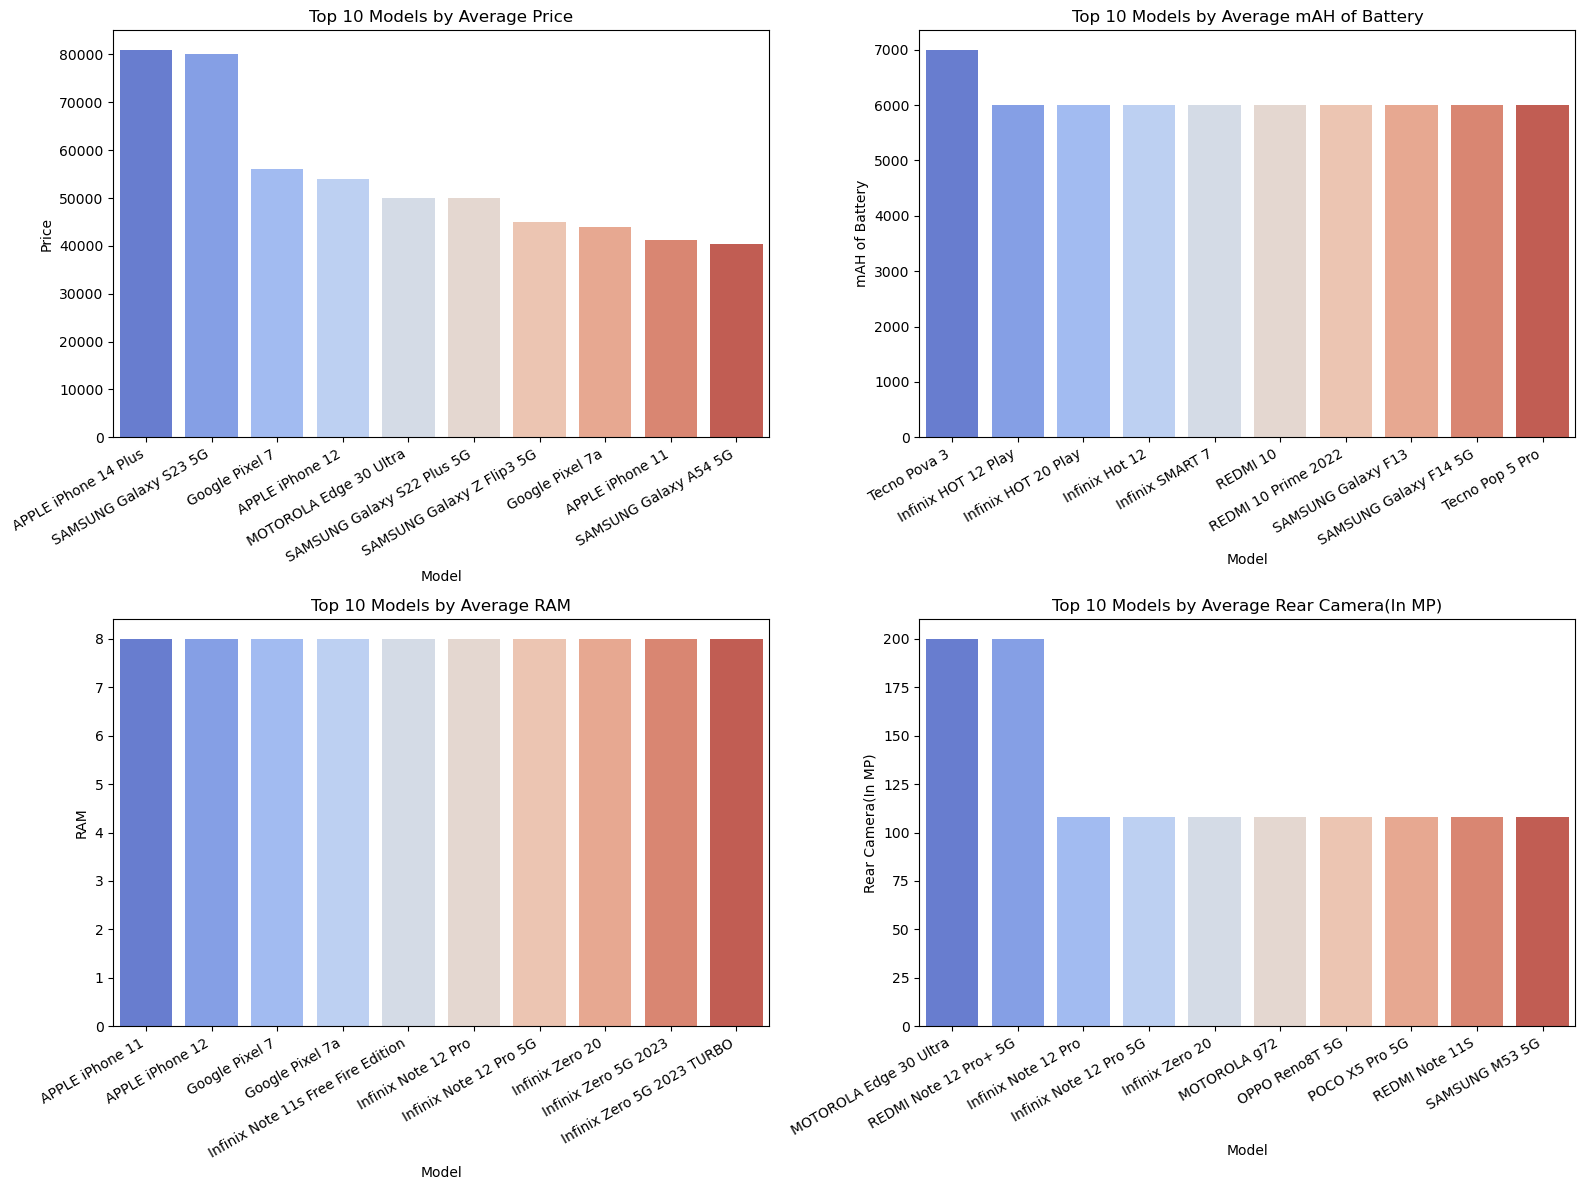

In [2087]:
# Define numerical features
numerical_features = ["Price", "mAH of Battery", "RAM", "Rear Camera(In MP)"]

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))  # Increased figure size

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through numerical features and create bar plots (VERTICAL)
for i, feature in enumerate(numerical_features):
    avg_values = df.groupby("Model")[feature].mean().nlargest(10)  # Get top 10 models only
    sns.barplot(x=avg_values.index, y=avg_values.values, palette="coolwarm", ax=axes[i])  # Vertical plot
    axes[i].set_xlabel("Model")  
    axes[i].set_ylabel(feature)  
    axes[i].set_title(f"Top 10 Models by Average {feature}")  
    axes[i].set_xticklabels(avg_values.index, rotation=30, ha="right")  # Rotated labels for clarity

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


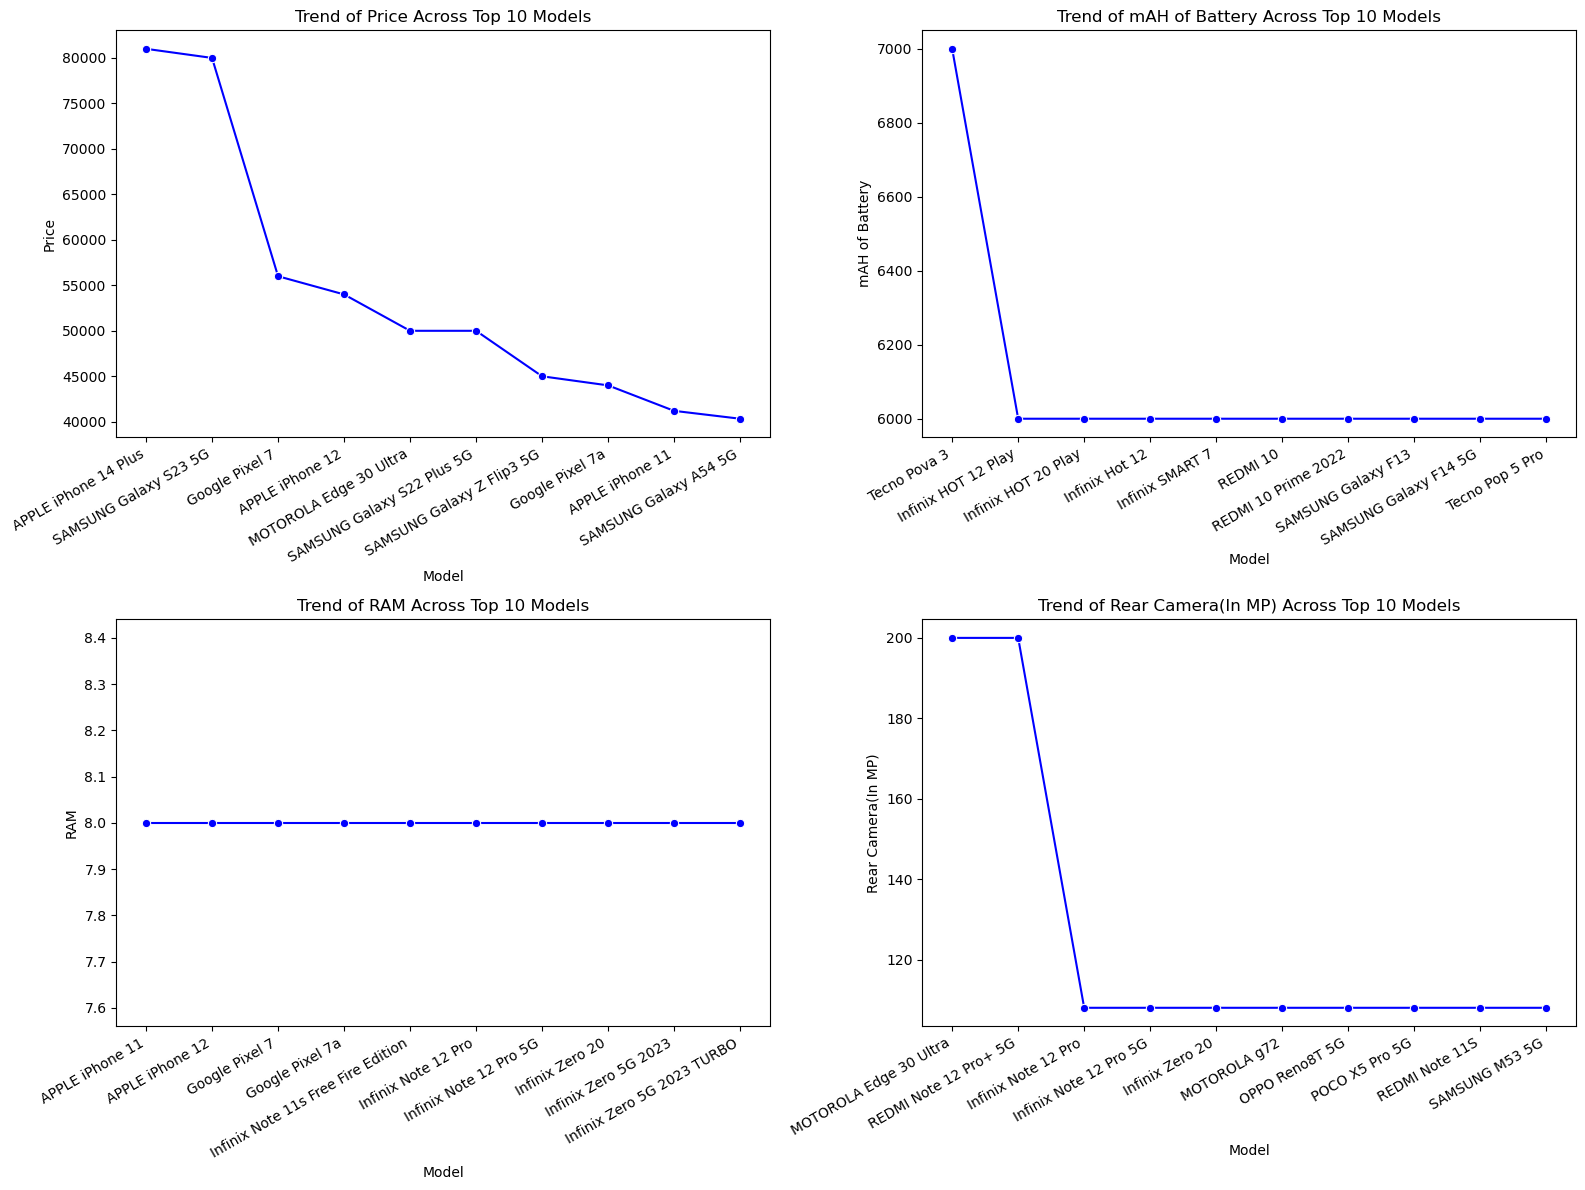

In [2090]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical features
numerical_features = ["Price", "mAH of Battery", "RAM", "Rear Camera(In MP)"]

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))  # Larger figure size

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through numerical features and create line plots
for i, feature in enumerate(numerical_features):
    avg_values = df.groupby("Model")[feature].mean().nlargest(10)  # Get top 10 models only
    sns.lineplot(x=avg_values.index, y=avg_values.values, marker="o", color="b", ax=axes[i])  # Line plot with markers
    axes[i].set_xlabel("Model")  
    axes[i].set_ylabel(feature)  
    axes[i].set_title(f"Trend of {feature} Across Top 10 Models")  
    axes[i].set_xticklabels(avg_values.index, rotation=30, ha="right")  # Rotated labels for clarity

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


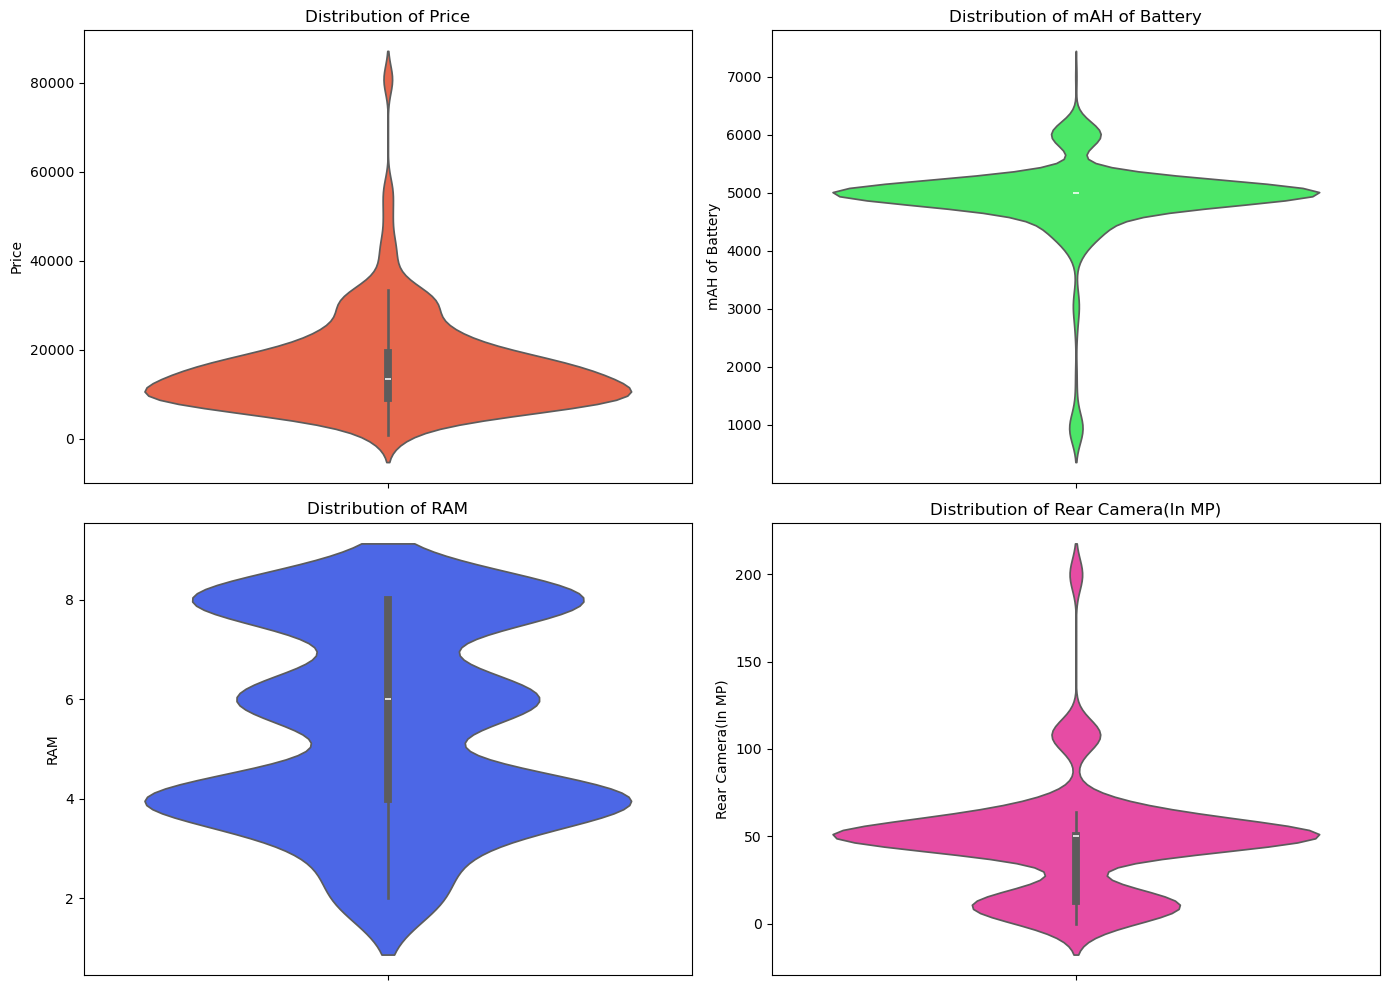

In [2092]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical features
numerical_features = ["Price", "mAH of Battery", "RAM", "Rear Camera(In MP)"]

# Define different colors for each violin plot
colors = ["#FF5733", "#33FF57", "#3357FF", "#FF33A8"]  # Red, Green, Blue, Pink

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))  # Adjusted figure size

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through numerical features and create violin plots
for i, feature in enumerate(numerical_features):
    sns.violinplot(y=df[feature], color=colors[i], ax=axes[i])  # Assign different colors
    axes[i].set_ylabel(feature)  
    axes[i].set_title(f"Distribution of {feature}")  

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


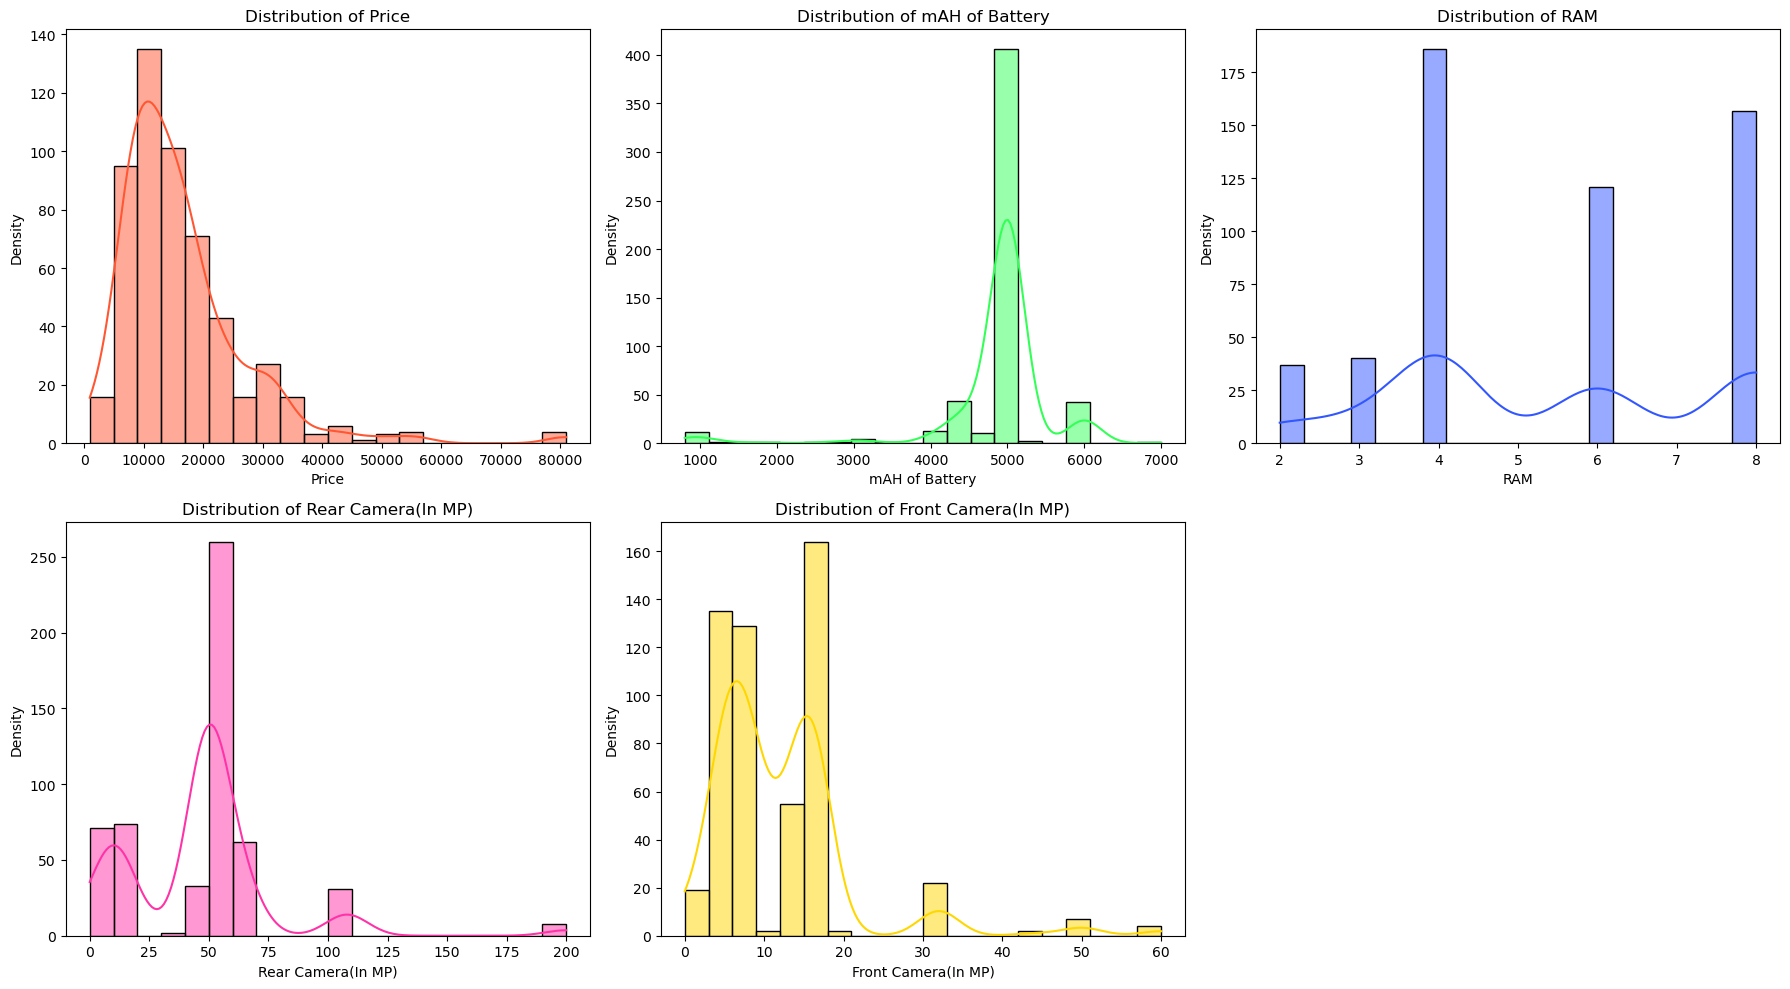

In [2093]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical features (including Front Camera)
numerical_features = ["Price", "mAH of Battery", "RAM", "Rear Camera(In MP)", "Front Camera(In MP)"]

# Define different colors for each plot
colors = ["#FF5733", "#33FF57", "#3357FF", "#FF33A8", "#FFD700"]  # Red, Green, Blue, Pink, Gold

# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # Adjusted figure size

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through numerical features and create distplots
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, bins=20, color=colors[i], ax=axes[i])  # Histogram with KDE
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Density")
    axes[i].set_title(f"Distribution of {feature}")

# Remove empty subplot if the number of features is odd
if len(numerical_features) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


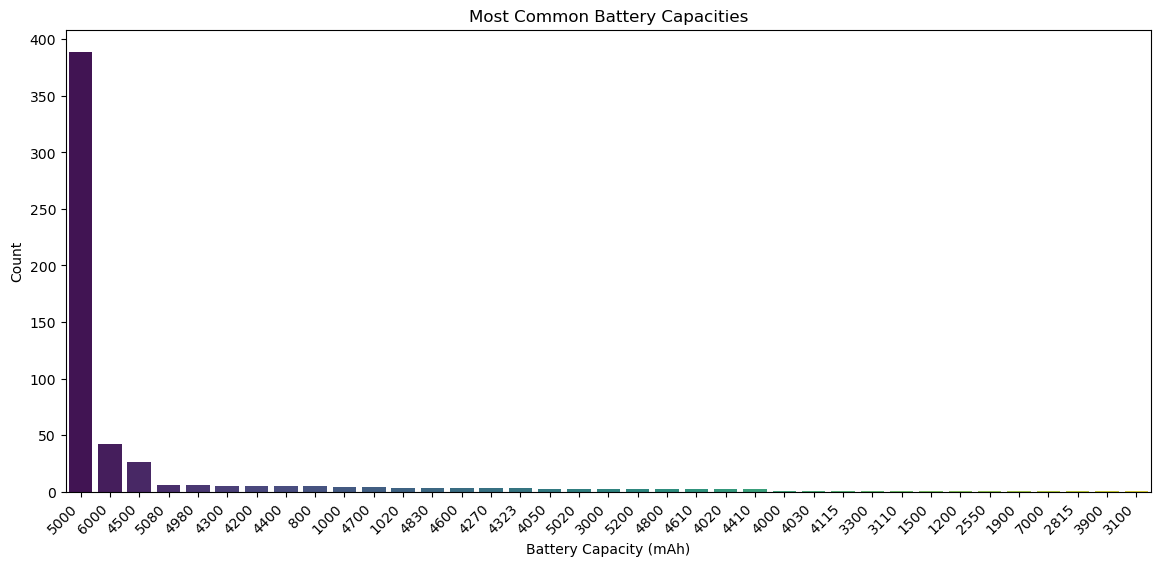

In [2096]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))  # Adjust size for better visibility
sns.countplot(x=df['mAH of Battery'].astype(str), palette="viridis", order=df['mAH of Battery'].value_counts().index)

plt.xlabel("Battery Capacity (mAh)")
plt.ylabel("Count")
plt.title("Most Common Battery Capacities")
plt.xticks(rotation=45, ha="right")  # Rotate labels to prevent overlap
plt.show()


In [2098]:
df

Model          Colour  Memory  RAM  mAH of Battery  \
0          Infinix SMART 7     Night Black      64    4            6000   
1          Infinix SMART 7      Azure Blue      64    4            6000   
2             MOTOROLA G32    Mineral Gray     128    8            5000   
3                 POCO C50      Royal Blue      32    2            5000   
4          Infinix HOT 30i        Marigold     128    8            5000   
..                     ...             ...     ...  ...             ...   
536  SAMSUNG Galaxy S23 5G           Cream     256    8            3900   
537               LAVA Z21            Cyan      32    2            3100   
538         Tecno Spark 8T  Turquoise Cyan      64    4            5000   
539  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8            5000   
540               OPPO A77        Sky Blue     128    4            5000   

     Rear Camera(In MP)  Front Camera(In MP)  AI Lens  Mobile Height  \
0                    13                    5        1          16.76   
1                    13                    5        1          16.76   
2                    50                   16        0          16.64   
3                     8                    5        0          16.56   
4                    50                    5        1          16.76   
..                  ...                  ...      ...            ...   
536                  50                   12        0          15.49   
537                   5                    2        0          12.70   
538                  50                    8        0          16.76   
539                  50                   32        0          16.26   
540                  50                    8        0          16.66   

                       Processor  Price  
0     Unisoc Spreadtrum SC9863A1   7299  
1     Unisoc Spreadtrum SC9863A1   7299  
2        Qualcomm Snapdragon 680  11999  
3             Mediatek Helio A22   5649  
4                            G37   8999  
..                           ...    ...  
536  Qualcomm Snapdragon 8 Gen 2  79999  
537                    Octa Core   5998  
538           MediaTek Helio G35   9990  
539      Exynos 1380, Octa Core   38999  
540           Mediatek Helio G35  15999  

[541 rows x 11 columns]

In [2100]:
color_mapping = {
    'Night Black': 'Black',
    'Azure Blue': 'Blue',
    'Mineral Gray': 'Gray',
    'Royal Blue': 'Blue',
    'Marigold': 'Orange',
    'Sky Blue': 'Blue',
    'Charcoal Gray': 'Gray',
    'Midnight Green': 'Green'
}

df['Colour_Simplified'] = df['Colour'].replace(color_mapping)
df


Model          Colour  Memory  RAM  mAH of Battery  \
0          Infinix SMART 7     Night Black      64    4            6000   
1          Infinix SMART 7      Azure Blue      64    4            6000   
2             MOTOROLA G32    Mineral Gray     128    8            5000   
3                 POCO C50      Royal Blue      32    2            5000   
4          Infinix HOT 30i        Marigold     128    8            5000   
..                     ...             ...     ...  ...             ...   
536  SAMSUNG Galaxy S23 5G           Cream     256    8            3900   
537               LAVA Z21            Cyan      32    2            3100   
538         Tecno Spark 8T  Turquoise Cyan      64    4            5000   
539  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8            5000   
540               OPPO A77        Sky Blue     128    4            5000   

     Rear Camera(In MP)  Front Camera(In MP)  AI Lens  Mobile Height  \
0                    13                    5        1          16.76   
1                    13                    5        1          16.76   
2                    50                   16        0          16.64   
3                     8                    5        0          16.56   
4                    50                    5        1          16.76   
..                  ...                  ...      ...            ...   
536                  50                   12        0          15.49   
537                   5                    2        0          12.70   
538                  50                    8        0          16.76   
539                  50                   32        0          16.26   
540                  50                    8        0          16.66   

                       Processor  Price Colour_Simplified  
0     Unisoc Spreadtrum SC9863A1   7299             Black  
1     Unisoc Spreadtrum SC9863A1   7299              Blue  
2        Qualcomm Snapdragon 680  11999              Gray  
3             Mediatek Helio A22   5649              Blue  
4                            G37   8999            Orange  
..                           ...    ...               ...  
536  Qualcomm Snapdragon 8 Gen 2  79999             Cream  
537                    Octa Core   5998              Cyan  
538           MediaTek Helio G35   9990    Turquoise Cyan  
539      Exynos 1380, Octa Core   38999      Awesome Lime  
540           Mediatek Helio G35  15999              Blue  

[541 rows x 12 columns]

In [2104]:
# price categories
bins = [0, 5000, 10000, 15000, 20000, float('inf')]
labels = ["Budget (<5K)", "Mid-Range (5K-10K)", "Upper Mid-Range (10K-15K)", "Premium (15K-20K)", "Flagship (>20K)"]

# Creating the price category column
df["Price Category"] = pd.cut(df["Price"], bins=bins, labels=labels)
df

Model          Colour  Memory  RAM  mAH of Battery  \
0          Infinix SMART 7     Night Black      64    4            6000   
1          Infinix SMART 7      Azure Blue      64    4            6000   
2             MOTOROLA G32    Mineral Gray     128    8            5000   
3                 POCO C50      Royal Blue      32    2            5000   
4          Infinix HOT 30i        Marigold     128    8            5000   
..                     ...             ...     ...  ...             ...   
536  SAMSUNG Galaxy S23 5G           Cream     256    8            3900   
537               LAVA Z21            Cyan      32    2            3100   
538         Tecno Spark 8T  Turquoise Cyan      64    4            5000   
539  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8            5000   
540               OPPO A77        Sky Blue     128    4            5000   

     Rear Camera(In MP)  Front Camera(In MP)  AI Lens  Mobile Height  \
0                    13                    5        1          16.76   
1                    13                    5        1          16.76   
2                    50                   16        0          16.64   
3                     8                    5        0          16.56   
4                    50                    5        1          16.76   
..                  ...                  ...      ...            ...   
536                  50                   12        0          15.49   
537                   5                    2        0          12.70   
538                  50                    8        0          16.76   
539                  50                   32        0          16.26   
540                  50                    8        0          16.66   

                       Processor  Price Colour_Simplified  \
0     Unisoc Spreadtrum SC9863A1   7299             Black   
1     Unisoc Spreadtrum SC9863A1   7299              Blue   
2        Qualcomm Snapdragon 680  11999              Gray   
3             Mediatek Helio A22   5649              Blue   
4                            G37   8999            Orange   
..                           ...    ...               ...   
536  Qualcomm Snapdragon 8 Gen 2  79999             Cream   
537                    Octa Core   5998              Cyan   
538           MediaTek Helio G35   9990    Turquoise Cyan   
539      Exynos 1380, Octa Core   38999      Awesome Lime   
540           Mediatek Helio G35  15999              Blue   

                Price Category  
0           Mid-Range (5K-10K)  
1           Mid-Range (5K-10K)  
2    Upper Mid-Range (10K-15K)  
3           Mid-Range (5K-10K)  
4           Mid-Range (5K-10K)  
..                         ...  
536            Flagship (>20K)  
537         Mid-Range (5K-10K)  
538         Mid-Range (5K-10K)  
539            Flagship (>20K)  
540          Premium (15K-20K)  

[541 rows x 13 columns]

# BARPLOT Price Vs Memory

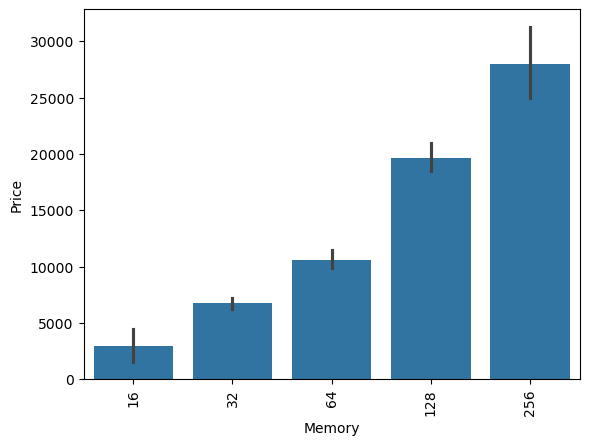

In [2107]:
sns.barplot(x=df['Memory'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.grid(False)
plt.show()

# COUNTPLOT (Price Category Vs Count)

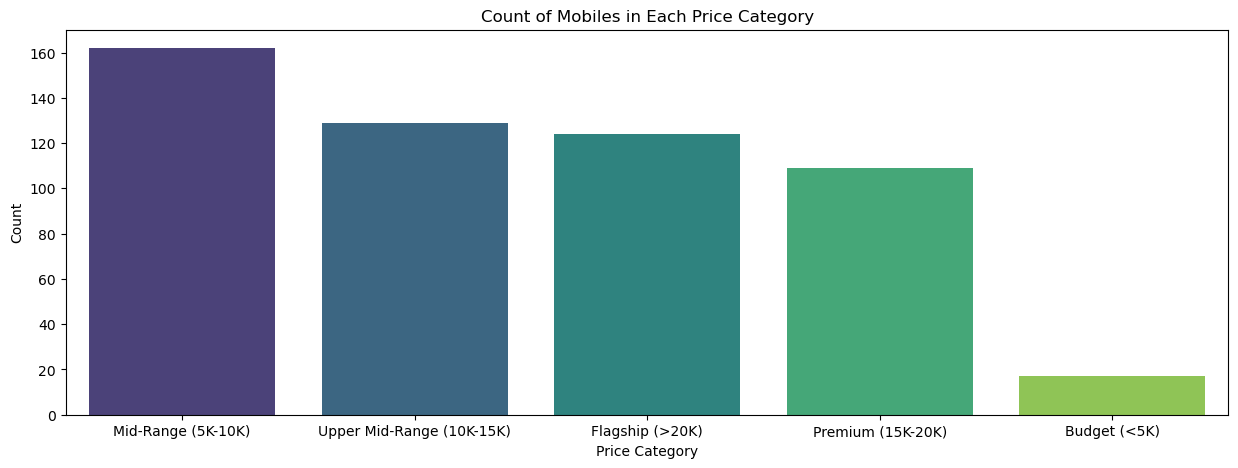

In [2110]:
plt.figure(figsize=(15, 5))
sns.countplot(x=df["Price Category"], order=df["Price Category"].value_counts().index, palette="viridis")
plt.title("Count of Mobiles in Each Price Category")
plt.xlabel("Price Category")
plt.ylabel("Count")
plt.grid(False)
plt.show()

# BARPLOT of RAM

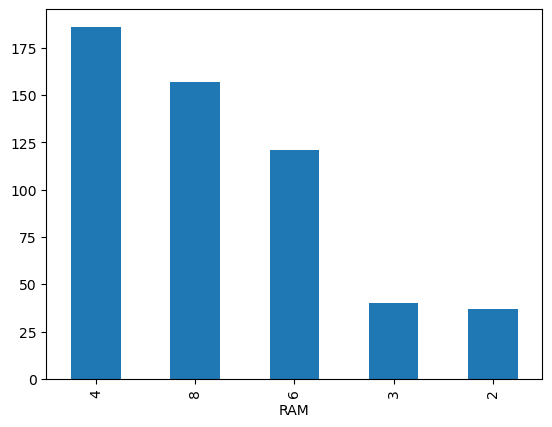

In [2113]:
df['RAM'].value_counts().plot(kind='bar')
plt.grid(False)

In [2115]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal for selected columns
df_cleaned = df.copy()
for col in ['Price', 'RAM', 'Rear Camera(In MP)', 'Front Camera(In MP)']:
    df_cleaned = remove_outliers(df_cleaned, col)

print("Shape before outlier removal:", df.shape)
print("Shape after outlier removal:", df_cleaned.shape)

Shape before outlier removal: (541, 13)
Shape after outlier removal: (471, 13)


In [2117]:
df

Model          Colour  Memory  RAM  mAH of Battery  \
0          Infinix SMART 7     Night Black      64    4            6000   
1          Infinix SMART 7      Azure Blue      64    4            6000   
2             MOTOROLA G32    Mineral Gray     128    8            5000   
3                 POCO C50      Royal Blue      32    2            5000   
4          Infinix HOT 30i        Marigold     128    8            5000   
..                     ...             ...     ...  ...             ...   
536  SAMSUNG Galaxy S23 5G           Cream     256    8            3900   
537               LAVA Z21            Cyan      32    2            3100   
538         Tecno Spark 8T  Turquoise Cyan      64    4            5000   
539  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8            5000   
540               OPPO A77        Sky Blue     128    4            5000   

     Rear Camera(In MP)  Front Camera(In MP)  AI Lens  Mobile Height  \
0                    13                    5        1          16.76   
1                    13                    5        1          16.76   
2                    50                   16        0          16.64   
3                     8                    5        0          16.56   
4                    50                    5        1          16.76   
..                  ...                  ...      ...            ...   
536                  50                   12        0          15.49   
537                   5                    2        0          12.70   
538                  50                    8        0          16.76   
539                  50                   32        0          16.26   
540                  50                    8        0          16.66   

                       Processor  Price Colour_Simplified  \
0     Unisoc Spreadtrum SC9863A1   7299             Black   
1     Unisoc Spreadtrum SC9863A1   7299              Blue   
2        Qualcomm Snapdragon 680  11999              Gray   
3             Mediatek Helio A22   5649              Blue   
4                            G37   8999            Orange   
..                           ...    ...               ...   
536  Qualcomm Snapdragon 8 Gen 2  79999             Cream   
537                    Octa Core   5998              Cyan   
538           MediaTek Helio G35   9990    Turquoise Cyan   
539      Exynos 1380, Octa Core   38999      Awesome Lime   
540           Mediatek Helio G35  15999              Blue   

                Price Category  
0           Mid-Range (5K-10K)  
1           Mid-Range (5K-10K)  
2    Upper Mid-Range (10K-15K)  
3           Mid-Range (5K-10K)  
4           Mid-Range (5K-10K)  
..                         ...  
536            Flagship (>20K)  
537         Mid-Range (5K-10K)  
538         Mid-Range (5K-10K)  
539            Flagship (>20K)  
540          Premium (15K-20K)  

[541 rows x 13 columns]

# Bivariate Analysis

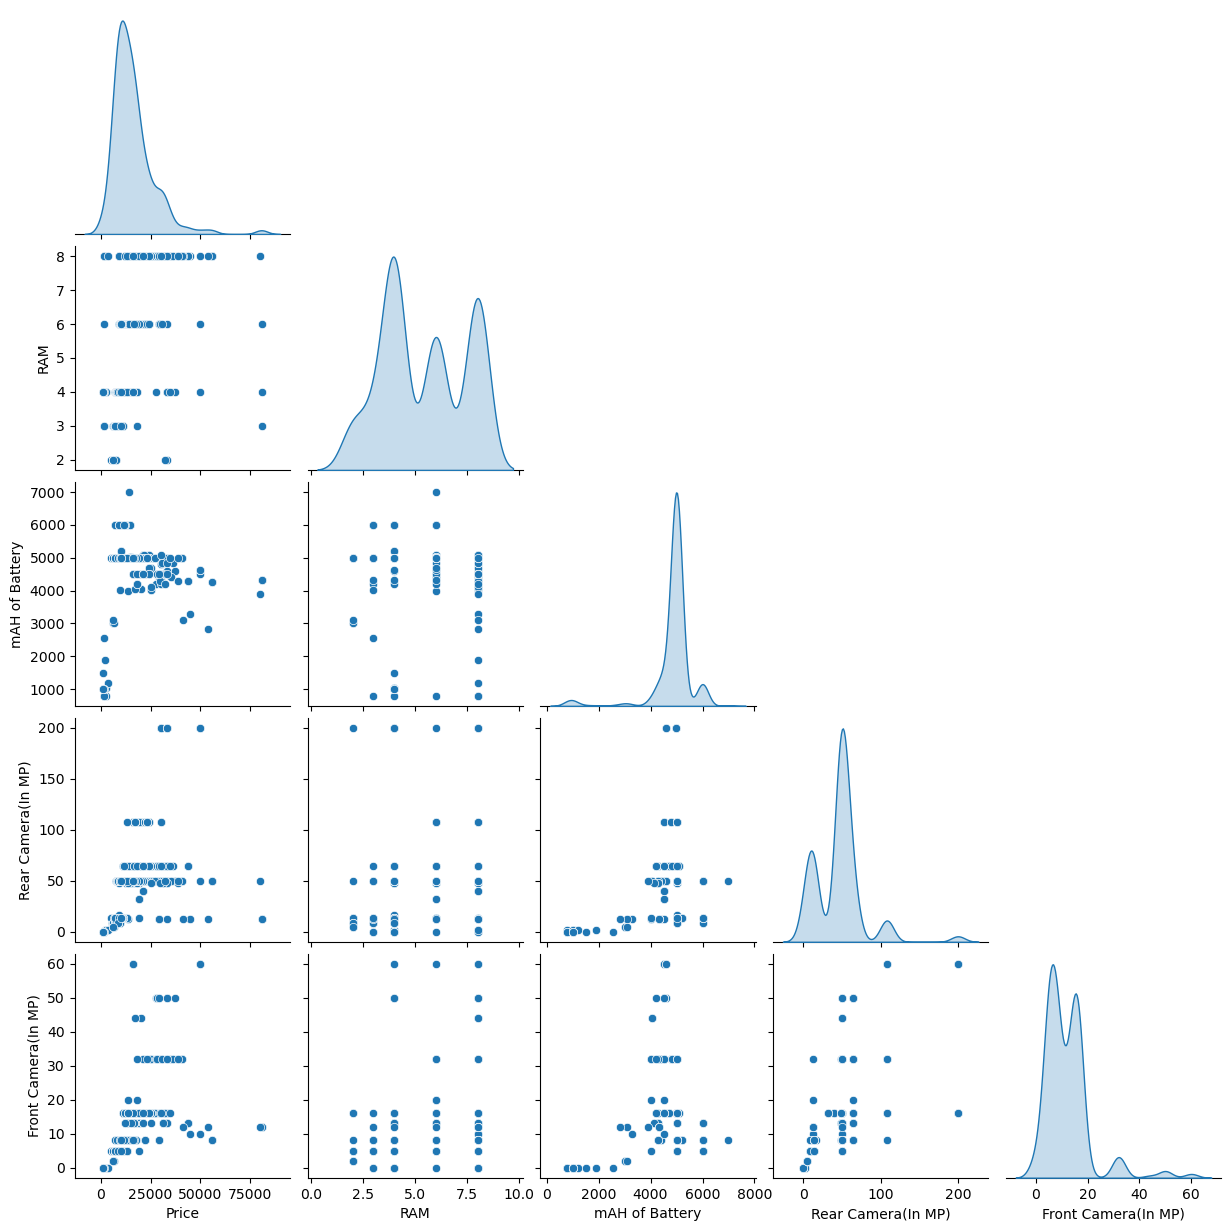

In [2120]:
selected_features = ['Price', 'RAM', 'mAH of Battery', 'Rear Camera(In MP)', 'Front Camera(In MP)']

#Pairplot
sns.pairplot(df[selected_features], diag_kind='kde', corner=True)

plt.show()

In [2121]:
# Price vs RAM

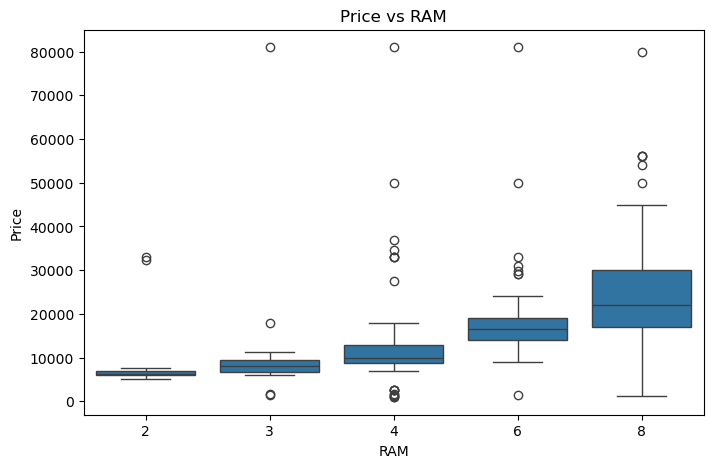

In [2122]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["RAM"], y=df["Price"])
plt.title("Price vs RAM")
plt.show()

In [2126]:
# Price vs Storage

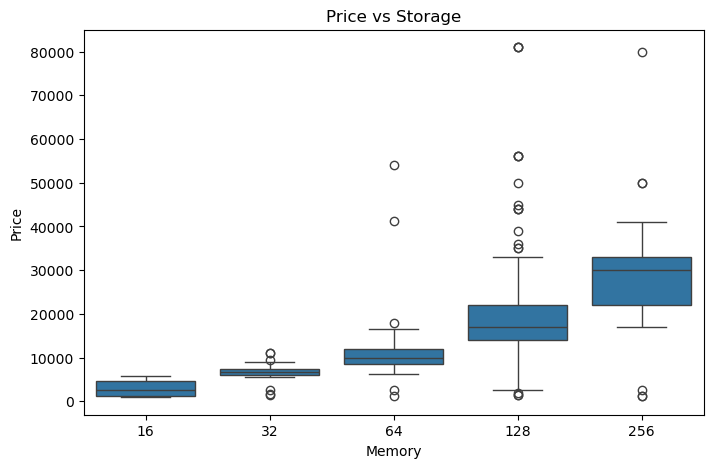

In [2128]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Memory"], y=df["Price"])
plt.title("Price vs Storage")
plt.show()

In [2130]:
# Price vs Processor

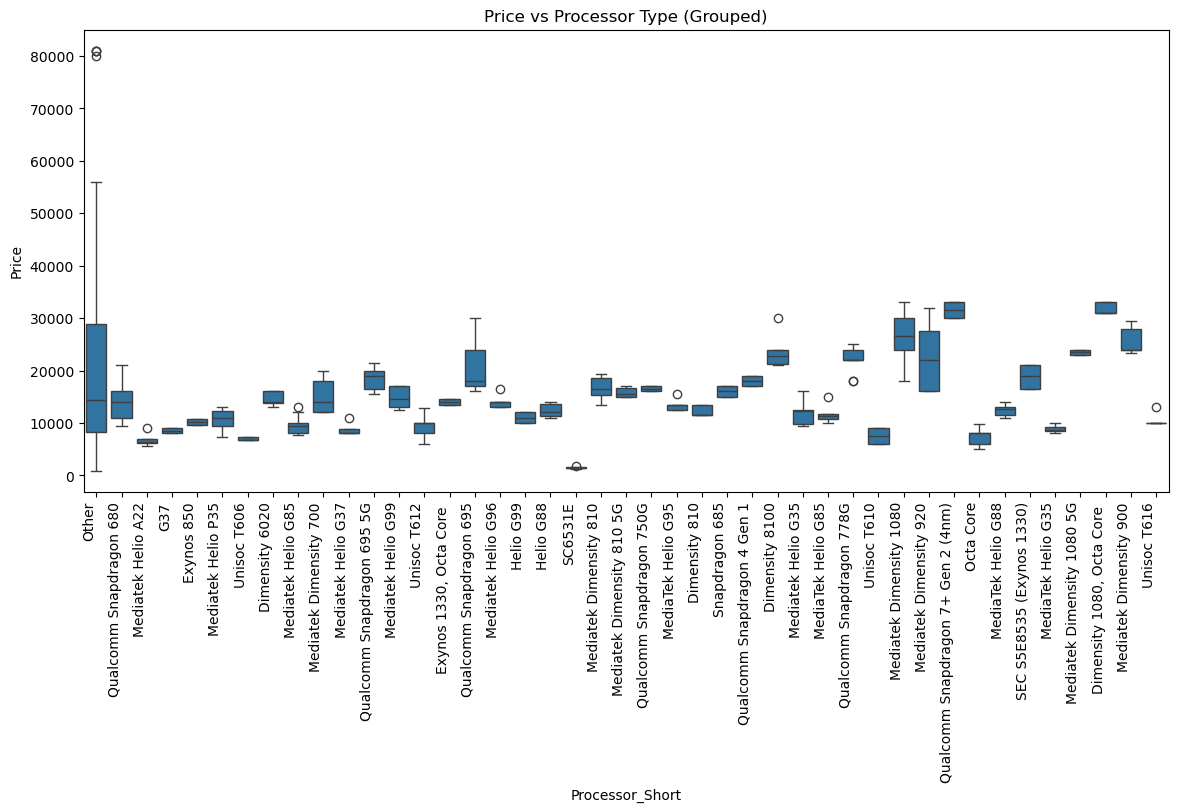

In [2132]:
df["Processor_Short"] = df["Processor"].apply(lambda x: "Other" if df["Processor"].value_counts()[x] < 5 else x)

plt.figure(figsize=(14, 6))
sns.boxplot(x=df["Processor_Short"], y=df["Price"])
plt.xticks(rotation='vertical', ha="right")
plt.title("Price vs Processor Type (Grouped)")
plt.show()

# Correlation Heatmap (Numerical Features)

Index(['Memory', 'RAM', 'mAH of Battery', 'Rear Camera(In MP)',
       'Front Camera(In MP)', 'AI Lens', 'Mobile Height', 'Price'],
      dtype='object')


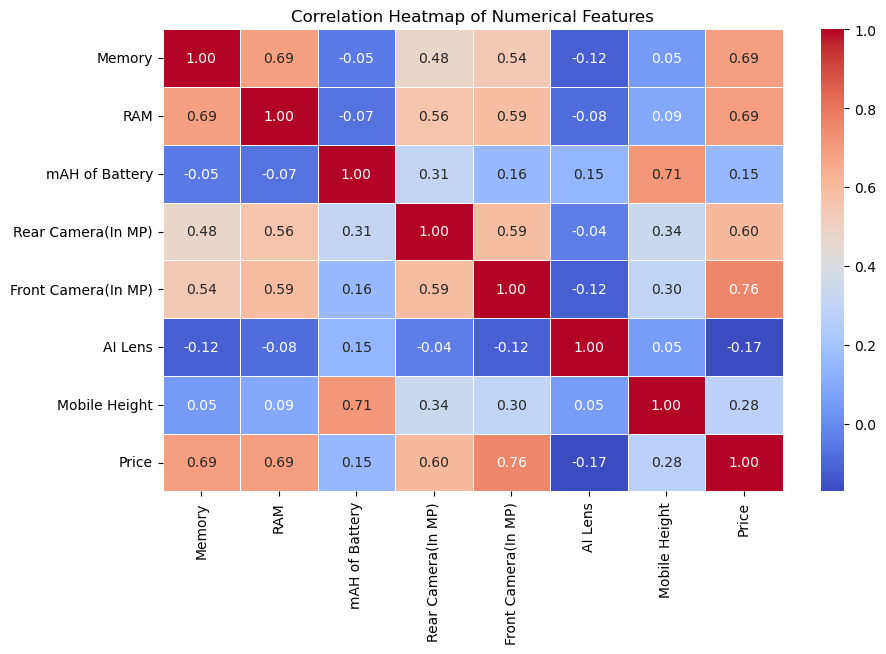

In [2135]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure all column names are clean
df_cleaned.columns = df_cleaned.columns.str.strip()

# Select only numerical columns (excluding "mAH of Battery" if missing)
numerical_df = df_cleaned.select_dtypes(include=["int64", "float64"])

# Print columns to verify
print(numerical_df.columns)

# Compute and plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features")
plt.show()



# SCATTER PLOT

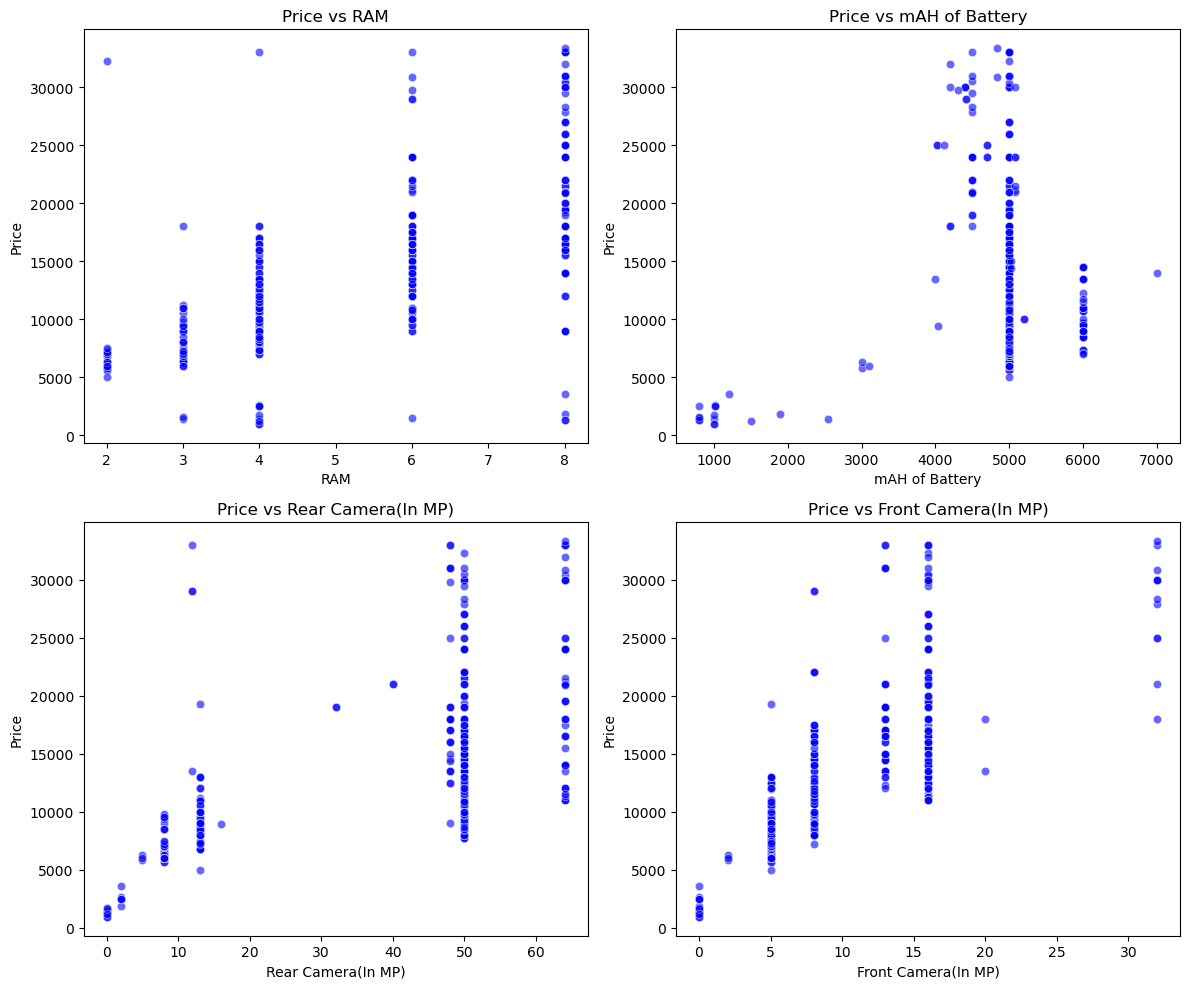

In [2138]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure "mAH of Battery" exists in df_cleaned
if "mAH of Battery" not in df_cleaned.columns or df_cleaned["mAH of Battery"].isnull().all():
    df_cleaned["mAH of Battery"] = df["mAH of Battery"]  # Restore from original dataset

# Convert "mAH of Battery" to numeric
df_cleaned["mAH of Battery"] = pd.to_numeric(df_cleaned["mAH of Battery"], errors="coerce")

# Drop NaN values in numerical columns
df_cleaned = df_cleaned.dropna(subset=["mAH of Battery", "Price"])

# Define numerical features
num_features = ["RAM", "mAH of Battery", "Rear Camera(In MP)", "Front Camera(In MP)"]

# Create subplots dynamically based on the number of features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))  # 2x2 grid
axes = axes.flatten()  # Flatten for easy indexing

# Loop through numerical features and create scatter plots
for i, feature in enumerate(num_features):
    sns.scatterplot(x=df_cleaned[feature], y=df_cleaned["Price"], ax=axes[i], color="blue", alpha=0.6)
    axes[i].set_title(f"Price vs {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Price")

# Adjust layout
plt.tight_layout()
plt.show()


# Code for Boxplots (Categorical vs. Price)

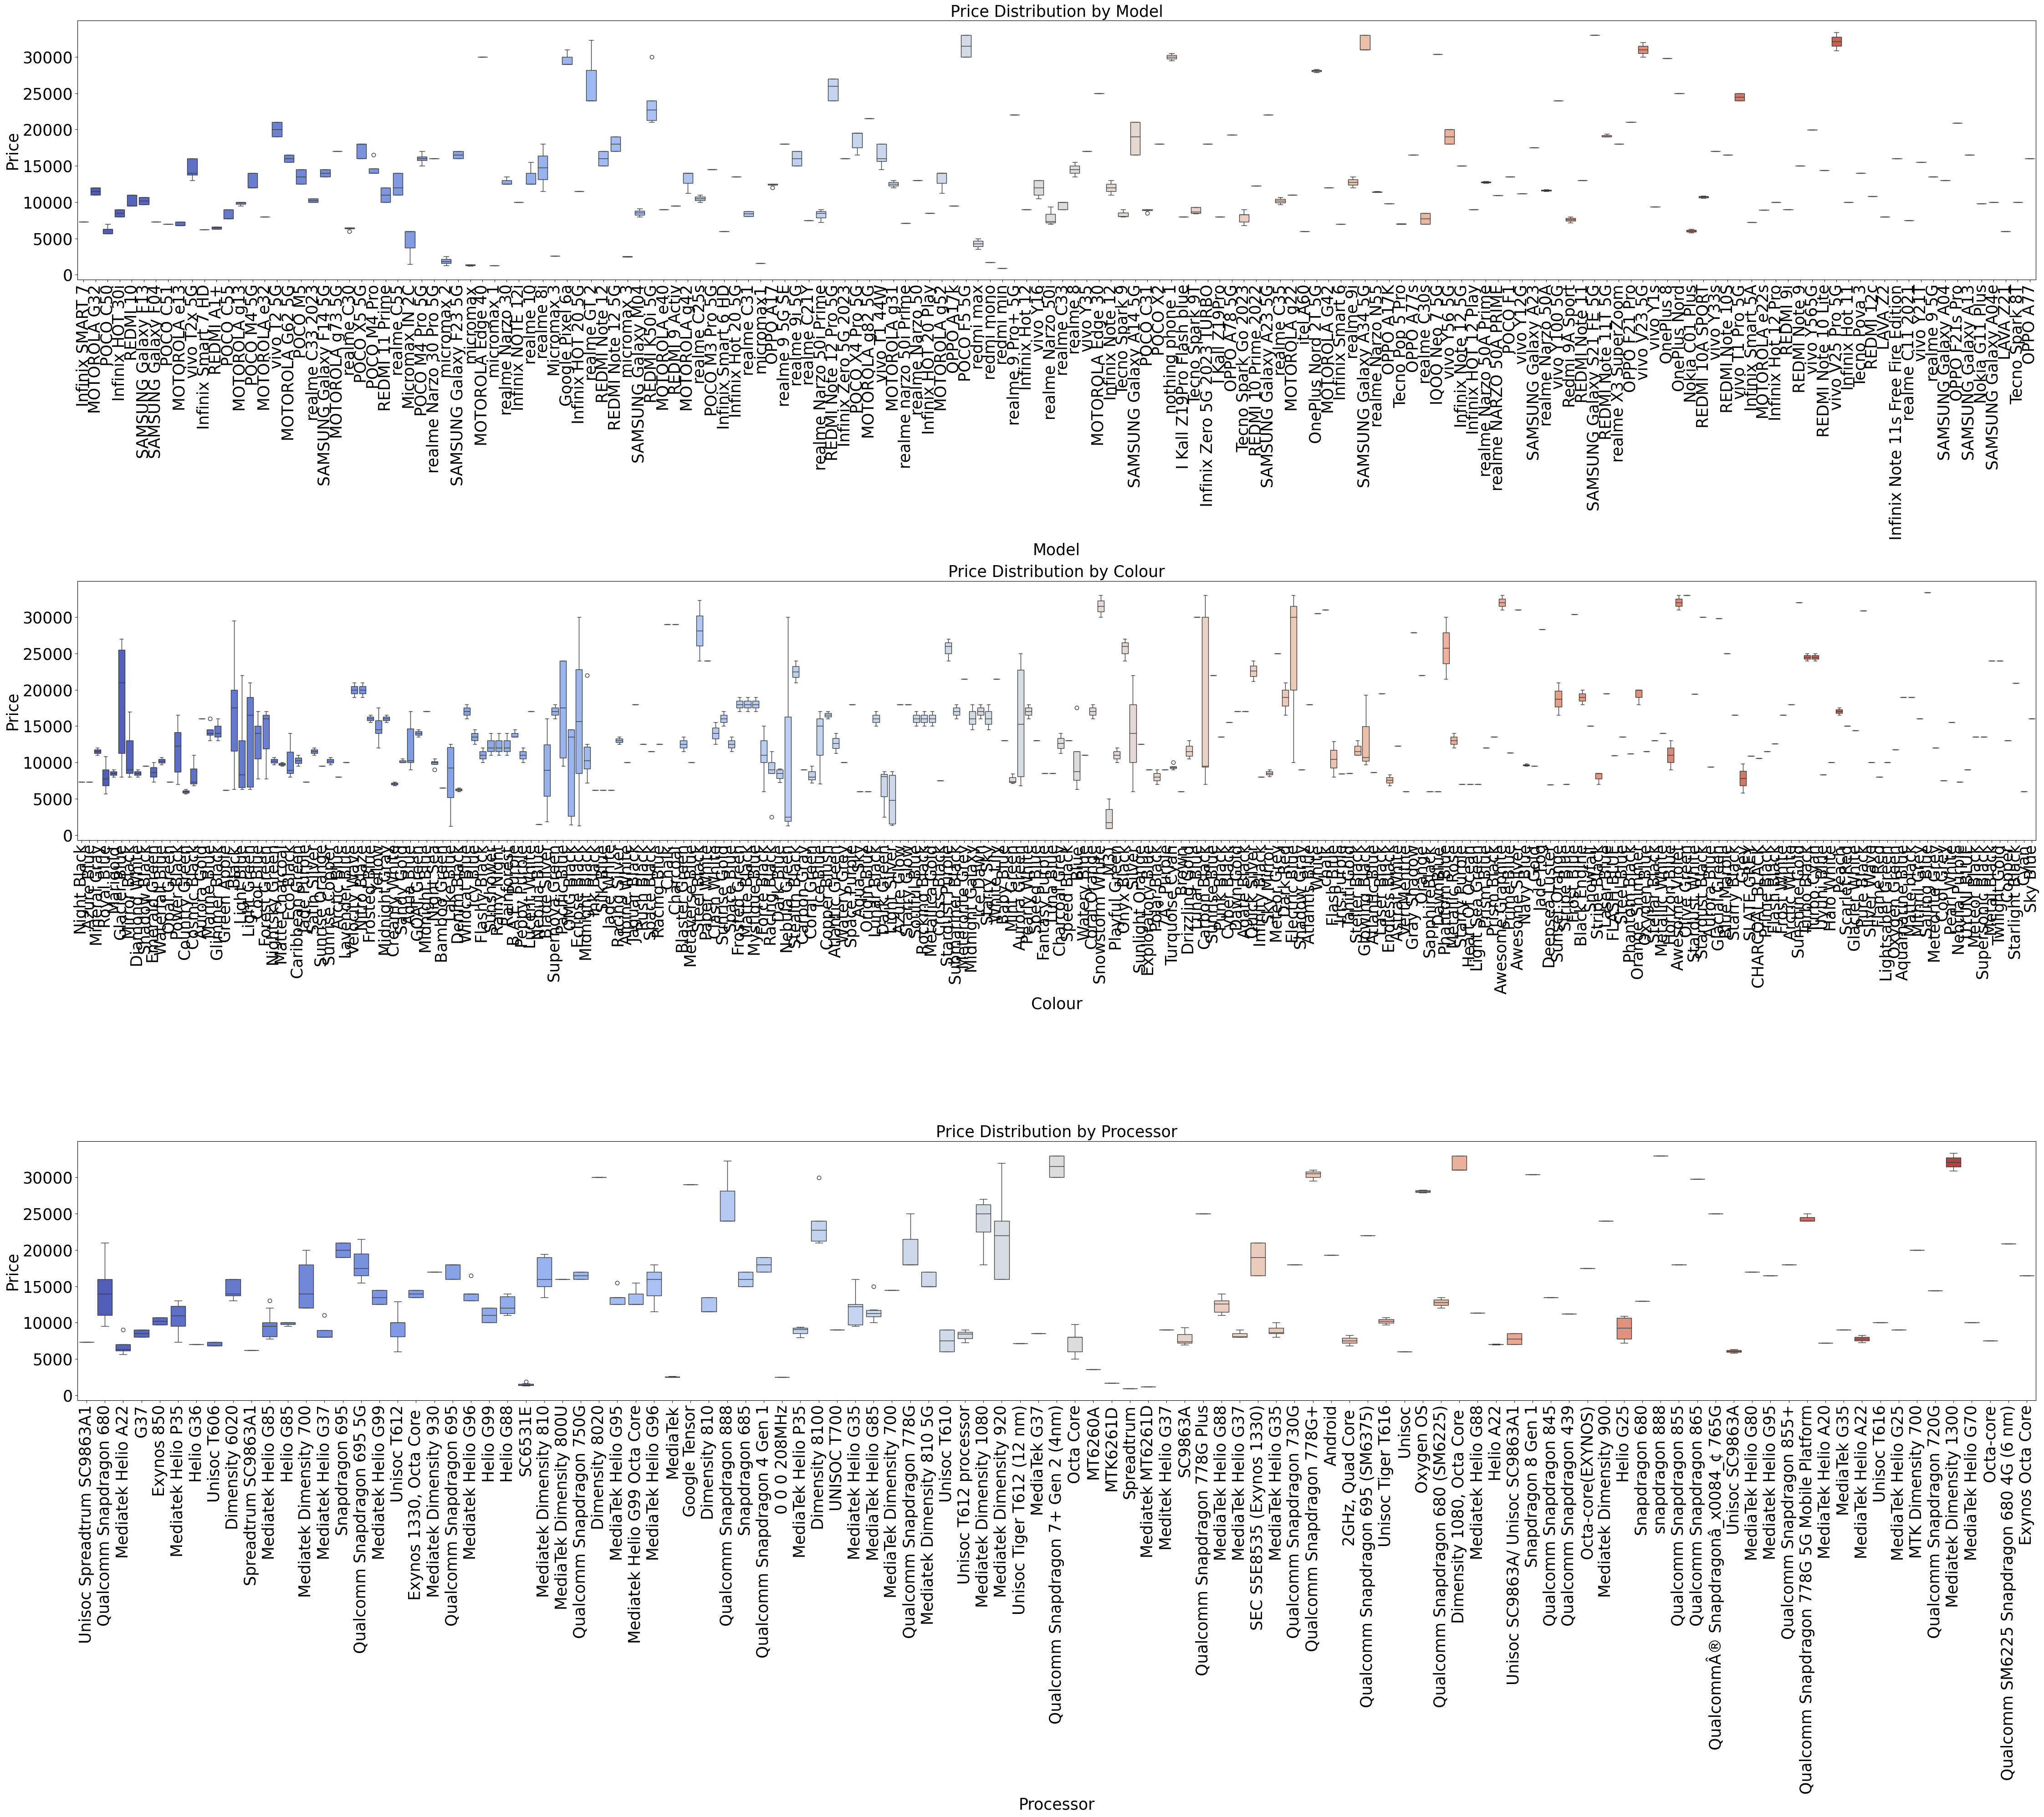

In [2141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical features to analyze
categorical_features = ["Model", "Colour", "Processor"]

# Create subplots with vertical alignment (one column)
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(45,40))

# Loop through categorical features and create boxplots
for i, feature in enumerate(categorical_features):
    sns.boxplot(x=df_cleaned[feature], y=df_cleaned["Price"], ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"Price Distribution by {feature}", fontsize=25)  # Title size
    axes[i].set_xlabel(feature, fontsize=25)  # Small x-axis label
    axes[i].set_ylabel("Price", fontsize=25)  # Small y-axis label
    axes[i].tick_params(axis="x", rotation=90, labelsize=25)  # Small tick labels
    axes[i].tick_params(axis="y", labelsize=25)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


# Compare the prices between different Models

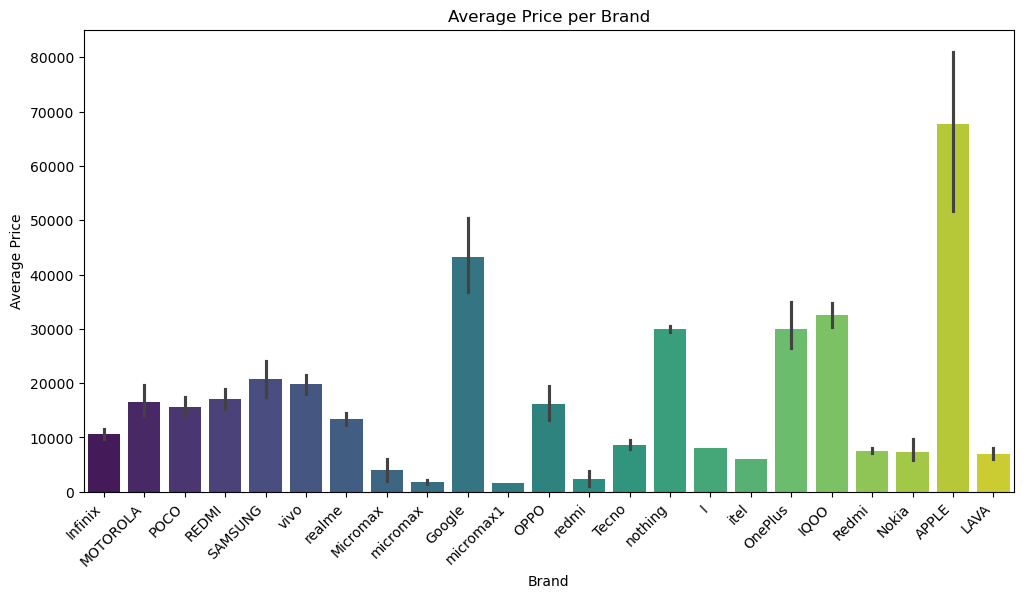

In [2144]:
df["Brand"] = df["Model"].apply(lambda x: x.split()[0])  # Extract brand from model name
plt.figure(figsize=(12, 6))
sns.barplot(x=df["Brand"], y=df["Price"], estimator=np.mean, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Average Price per Brand")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.show()

# Price distribution per Model

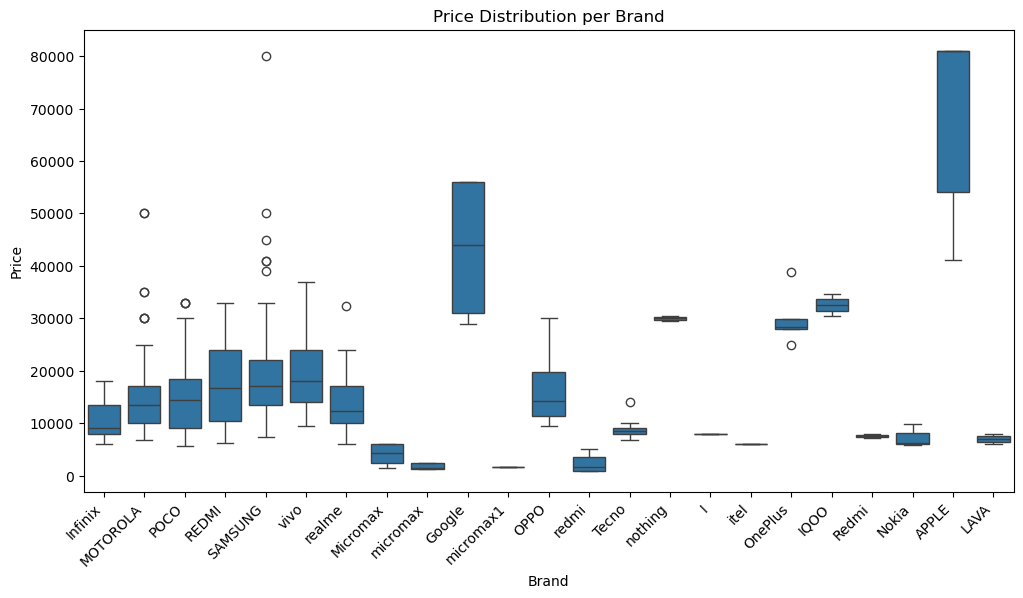

In [2146]:
df["Brand"] = df["Model"].apply(lambda x: x.split()[0])  # Extract brand name
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Brand"], y=df["Price"])
plt.xticks(rotation=45, ha="right")
plt.title("Price Distribution per Brand")
plt.xlabel("Brand")
plt.ylabel("Price")
plt.show()

In [2148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Model                541 non-null    object  
 1   Colour               541 non-null    object  
 2   Memory               541 non-null    int64   
 3   RAM                  541 non-null    int64   
 4   mAH of Battery       541 non-null    int64   
 5   Rear Camera(In MP)   541 non-null    int64   
 6   Front Camera(In MP)  541 non-null    int64   
 7   AI Lens              541 non-null    int64   
 8   Mobile Height        541 non-null    float64 
 9   Processor            541 non-null    object  
 10  Price                541 non-null    int64   
 11  Colour_Simplified    541 non-null    object  
 12  Price Category       541 non-null    category
 13  Processor_Short      541 non-null    object  
 14  Brand                541 non-null    object  
dtypes: category(1), float64

In [2150]:
df.head()

Model        Colour  Memory  RAM  mAH of Battery  \
0  Infinix SMART 7   Night Black      64    4            6000   
1  Infinix SMART 7    Azure Blue      64    4            6000   
2     MOTOROLA G32  Mineral Gray     128    8            5000   
3         POCO C50    Royal Blue      32    2            5000   
4  Infinix HOT 30i      Marigold     128    8            5000   

   Rear Camera(In MP)  Front Camera(In MP)  AI Lens  Mobile Height  \
0                  13                    5        1          16.76   
1                  13                    5        1          16.76   
2                  50                   16        0          16.64   
3                   8                    5        0          16.56   
4                  50                    5        1          16.76   

                    Processor  Price Colour_Simplified  \
0  Unisoc Spreadtrum SC9863A1   7299             Black   
1  Unisoc Spreadtrum SC9863A1   7299              Blue   
2     Qualcomm Snapdragon 680  11999              Gray   
3          Mediatek Helio A22   5649              Blue   
4                         G37   8999            Orange   

              Price Category          Processor_Short     Brand  
0         Mid-Range (5K-10K)                    Other   Infinix  
1         Mid-Range (5K-10K)                    Other   Infinix  
2  Upper Mid-Range (10K-15K)  Qualcomm Snapdragon 680  MOTOROLA  
3         Mid-Range (5K-10K)       Mediatek Helio A22      POCO  
4         Mid-Range (5K-10K)                      G37   Infinix

In [2154]:
df.isnull().sum()

Model                  0
Colour                 0
Memory                 0
RAM                    0
mAH of Battery         0
Rear Camera(In MP)     0
Front Camera(In MP)    0
AI Lens                0
Mobile Height          0
Processor              0
Price                  0
Colour_Simplified      0
Price Category         0
Processor_Short        0
Brand                  0
dtype: int64

In [2156]:
df.duplicated().sum()

10

In [2158]:
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)  # Reset index after dropping duplicates


In [2160]:
df.duplicated().sum()

0

In [2162]:
df

Model          Colour  Memory  RAM  mAH of Battery  \
0          Infinix SMART 7     Night Black      64    4            6000   
1          Infinix SMART 7      Azure Blue      64    4            6000   
2             MOTOROLA G32    Mineral Gray     128    8            5000   
3                 POCO C50      Royal Blue      32    2            5000   
4          Infinix HOT 30i        Marigold     128    8            5000   
..                     ...             ...     ...  ...             ...   
526  SAMSUNG Galaxy S23 5G           Cream     256    8            3900   
527               LAVA Z21            Cyan      32    2            3100   
528         Tecno Spark 8T  Turquoise Cyan      64    4            5000   
529  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8            5000   
530               OPPO A77        Sky Blue     128    4            5000   

     Rear Camera(In MP)  Front Camera(In MP)  AI Lens  Mobile Height  \
0                    13                    5        1          16.76   
1                    13                    5        1          16.76   
2                    50                   16        0          16.64   
3                     8                    5        0          16.56   
4                    50                    5        1          16.76   
..                  ...                  ...      ...            ...   
526                  50                   12        0          15.49   
527                   5                    2        0          12.70   
528                  50                    8        0          16.76   
529                  50                   32        0          16.26   
530                  50                    8        0          16.66   

                       Processor  Price Colour_Simplified  \
0     Unisoc Spreadtrum SC9863A1   7299             Black   
1     Unisoc Spreadtrum SC9863A1   7299              Blue   
2        Qualcomm Snapdragon 680  11999              Gray   
3             Mediatek Helio A22   5649              Blue   
4                            G37   8999            Orange   
..                           ...    ...               ...   
526  Qualcomm Snapdragon 8 Gen 2  79999             Cream   
527                    Octa Core   5998              Cyan   
528           MediaTek Helio G35   9990    Turquoise Cyan   
529      Exynos 1380, Octa Core   38999      Awesome Lime   
530           Mediatek Helio G35  15999              Blue   

                Price Category          Processor_Short     Brand  
0           Mid-Range (5K-10K)                    Other   Infinix  
1           Mid-Range (5K-10K)                    Other   Infinix  
2    Upper Mid-Range (10K-15K)  Qualcomm Snapdragon 680  MOTOROLA  
3           Mid-Range (5K-10K)       Mediatek Helio A22      POCO  
4           Mid-Range (5K-10K)                      G37   Infinix  
..                         ...                      ...       ...  
526            Flagship (>20K)                    Other   SAMSUNG  
527         Mid-Range (5K-10K)                Octa Core      LAVA  
528         Mid-Range (5K-10K)       MediaTek Helio G35     Tecno  
529            Flagship (>20K)                    Other   SAMSUNG  
530          Premium (15K-20K)       Mediatek Helio G35      OPPO  

[531 rows x 15 columns]

# Price category vs Price

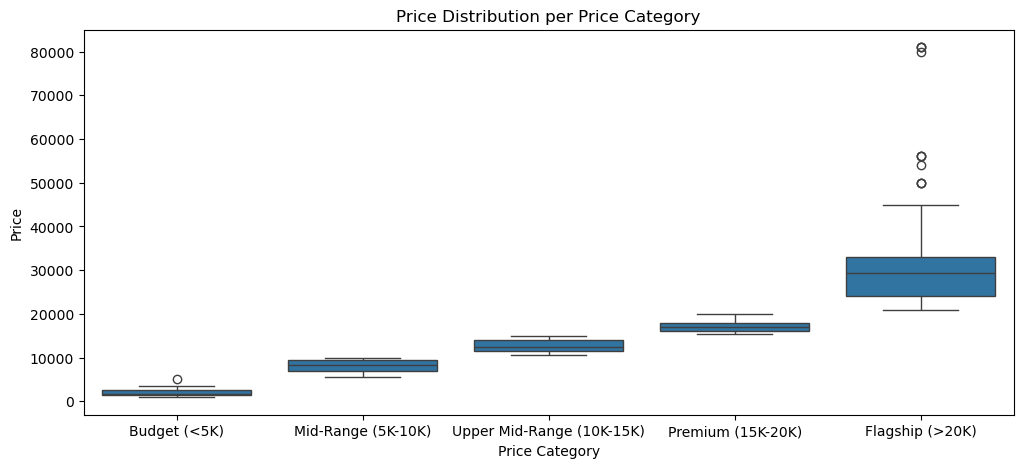

In [2164]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df["Price Category"], y=df["Price"])
plt.title("Price Distribution per Price Category")
plt.xlabel("Price Category")
plt.ylabel("Price")
plt.show()

# Label Encoding (For Ordinal Categorical Features)

In [2166]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders for the categorical variables
label_encoders = {col:LabelEncoder() for col in ['Model', 'Colour', 'Rear Camera(In MP)', 'Front Camera(In MP)', 'Processor']}

# Apply label encoding to each categorical column
for col, encoder in label_encoders.items():
    df[col] = encoder.fit_transform(df[col])
df

Model  Colour  Memory  RAM  mAH of Battery  Rear Camera(In MP)  \
0       23     159      64    4            6000                   5   
1       23      20      64    4            6000                   5   
2       37     149     128    8            5000                  10   
3       69     201      32    2            5000                   3   
4       12     130     128    8            5000                  10   
..     ...     ...     ...  ...             ...                 ...   
526    118      49     256    8            3900                  10   
527     32      52      32    2            3100                   2   
528    123     259      64    4            5000                  10   
529    110      17     128    8            5000                  10   
530     59     215     128    4            5000                  10   

     Front Camera(In MP)  AI Lens  Mobile Height  Processor  Price  \
0                      2        1          16.76        113   7299   
1                      2        1          16.76        113   7299   
2                      7        0          16.64         75  11999   
3                      2        0          16.56         56   5649   
4                      2        1          16.76         14   8999   
..                   ...      ...            ...        ...    ...   
526                    5        0          15.49         89  79999   
527                    1        0          12.70         68   5998   
528                    3        0          16.76         35   9990   
529                    9        0          16.26         11  38999   
530                    3        0          16.66         57  15999   

    Colour_Simplified             Price Category          Processor_Short  \
0               Black         Mid-Range (5K-10K)                    Other   
1                Blue         Mid-Range (5K-10K)                    Other   
2                Gray  Upper Mid-Range (10K-15K)  Qualcomm Snapdragon 680   
3                Blue         Mid-Range (5K-10K)       Mediatek Helio A22   
4              Orange         Mid-Range (5K-10K)                      G37   
..                ...                        ...                      ...   
526             Cream            Flagship (>20K)                    Other   
527              Cyan         Mid-Range (5K-10K)                Octa Core   
528    Turquoise Cyan         Mid-Range (5K-10K)       MediaTek Helio G35   
529      Awesome Lime            Flagship (>20K)                    Other   
530              Blue          Premium (15K-20K)       Mediatek Helio G35   

        Brand  
0     Infinix  
1     Infinix  
2    MOTOROLA  
3        POCO  
4     Infinix  
..        ...  
526   SAMSUNG  
527      LAVA  
528     Tecno  
529   SAMSUNG  
530      OPPO  

[531 rows x 15 columns]

In [2168]:
# Applying ordinal encoding

df['Model'] = encoder.fit_transform(df[['Model']])

df

Model  Colour  Memory  RAM  mAH of Battery  Rear Camera(In MP)  \
0       23     159      64    4            6000                   5   
1       23      20      64    4            6000                   5   
2       37     149     128    8            5000                  10   
3       69     201      32    2            5000                   3   
4       12     130     128    8            5000                  10   
..     ...     ...     ...  ...             ...                 ...   
526    118      49     256    8            3900                  10   
527     32      52      32    2            3100                   2   
528    123     259      64    4            5000                  10   
529    110      17     128    8            5000                  10   
530     59     215     128    4            5000                  10   

     Front Camera(In MP)  AI Lens  Mobile Height  Processor  Price  \
0                      2        1          16.76        113   7299   
1                      2        1          16.76        113   7299   
2                      7        0          16.64         75  11999   
3                      2        0          16.56         56   5649   
4                      2        1          16.76         14   8999   
..                   ...      ...            ...        ...    ...   
526                    5        0          15.49         89  79999   
527                    1        0          12.70         68   5998   
528                    3        0          16.76         35   9990   
529                    9        0          16.26         11  38999   
530                    3        0          16.66         57  15999   

    Colour_Simplified             Price Category          Processor_Short  \
0               Black         Mid-Range (5K-10K)                    Other   
1                Blue         Mid-Range (5K-10K)                    Other   
2                Gray  Upper Mid-Range (10K-15K)  Qualcomm Snapdragon 680   
3                Blue         Mid-Range (5K-10K)       Mediatek Helio A22   
4              Orange         Mid-Range (5K-10K)                      G37   
..                ...                        ...                      ...   
526             Cream            Flagship (>20K)                    Other   
527              Cyan         Mid-Range (5K-10K)                Octa Core   
528    Turquoise Cyan         Mid-Range (5K-10K)       MediaTek Helio G35   
529      Awesome Lime            Flagship (>20K)                    Other   
530              Blue          Premium (15K-20K)       Mediatek Helio G35   

        Brand  
0     Infinix  
1     Infinix  
2    MOTOROLA  
3        POCO  
4     Infinix  
..        ...  
526   SAMSUNG  
527      LAVA  
528     Tecno  
529   SAMSUNG  
530      OPPO  

[531 rows x 15 columns]

In [1934]:
df["Brand"] = df["Model"].astype(str).apply(lambda x: x.split()[0])
df

Model  Colour  Memory  RAM  mAH of Battery  Rear Camera(In MP)  \
0       23     159      64    4            6000                   5   
1       23      20      64    4            6000                   5   
2       37     149     128    8            5000                  10   
3       69     201      32    2            5000                   3   
4       12     130     128    8            5000                  10   
..     ...     ...     ...  ...             ...                 ...   
526    118      49     256    8            3900                  10   
527     32      52      32    2            3100                   2   
528    123     259      64    4            5000                  10   
529    110      17     128    8            5000                  10   
530     59     215     128    4            5000                  10   

     Front Camera(In MP)  AI Lens  Mobile Height  Processor  Price  \
0                      2        1          16.76        113   7299   
1                      2        1          16.76        113   7299   
2                      7        0          16.64         75  11999   
3                      2        0          16.56         56   5649   
4                      2        1          16.76         14   8999   
..                   ...      ...            ...        ...    ...   
526                    5        0          15.49         89  79999   
527                    1        0          12.70         68   5998   
528                    3        0          16.76         35   9990   
529                    9        0          16.26         11  38999   
530                    3        0          16.66         57  15999   

    Colour_Simplified             Price Category          Processor_Short  \
0               Black         Mid-Range (5K-10K)                    Other   
1                Blue         Mid-Range (5K-10K)                    Other   
2                Gray  Upper Mid-Range (10K-15K)  Qualcomm Snapdragon 680   
3                Blue         Mid-Range (5K-10K)       Mediatek Helio A22   
4              Orange         Mid-Range (5K-10K)                      G37   
..                ...                        ...                      ...   
526             Cream            Flagship (>20K)                    Other   
527              Cyan         Mid-Range (5K-10K)                Octa Core   
528    Turquoise Cyan         Mid-Range (5K-10K)       MediaTek Helio G35   
529      Awesome Lime            Flagship (>20K)                    Other   
530              Blue          Premium (15K-20K)       Mediatek Helio G35   

    Brand  
0      23  
1      23  
2      37  
3      69  
4      12  
..    ...  
526   118  
527    32  
528   123  
529   110  
530    59  

[531 rows x 15 columns]

# Feature extraction 

In [2170]:
 
features = data[['Memory', 'RAM', 'mAH of Battery', 'Rear Camera(In MP)', 'Front Camera(In MP)',  
                 'Processor', 'Brand']]  
target = data['Price']  

# One-Hot encode categorical features

In [2172]:
  
features = pd.get_dummies(features, columns=['Processor', 'Brand'], drop_first=True) 

# Split the data

In [2174]:
  
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42) 

# Random Forest Model

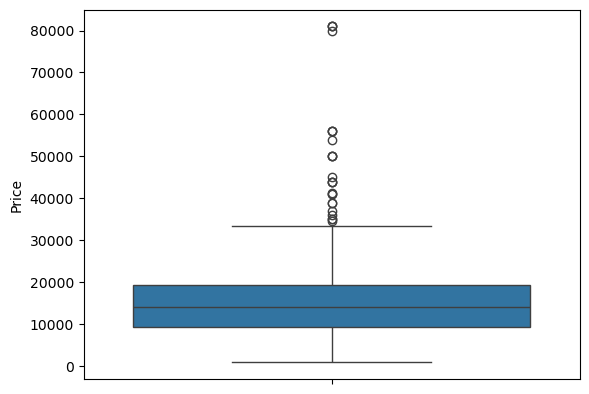

R2 Score: 0.9162898965461127
MAE: 0.08224714829786722


In [2176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# Ensure df is a DataFrame
df = pd.DataFrame(df)

# Check for outliers in Price
sns.boxplot(df['Price'])
plt.show()

# Optional: Apply log transformation if Price has extreme outliers
df['Price'] = np.log1p(df['Price'])  # Uncomment if necessary

# Define categorical and numerical columns
categorical_columns = ["Colour", "Processor", "Brand", "Model","Price Category","Colour_Simplified","Processor_Short"]  # Adjust as needed
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
numerical_columns.remove('Price')  # Ensure 'Price' is excluded

# Define transformations
step1 = ColumnTransformer(
    transformers=[
        ("ohe", OneHotEncoder(drop="first", sparse_output=False, handle_unknown='ignore'), categorical_columns),
        ("scaler", StandardScaler(), numerical_columns)
    ],
    remainder="passthrough"
)

# Use a more robust model
step2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Create pipeline
pipe = Pipeline([
    ('preprocessor', step1),
    ('model', step2)
])

# Split Data
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Evaluate Model
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

In [2178]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
print("Train R2 Score:", r2_score(y_train, y_train_pred))
print("Test R2 Score:", r2_score(y_test, y_test_pred))


Train R2 Score: 0.99538011657776
Test R2 Score: 0.9162898965461127


In [2180]:
print("Actual Prices:", y_test[:5].values)
print("Predicted Prices:", y_pred[:5])

Actual Prices: [10.08580911  9.10497986 10.69194491  9.04782144  9.21034037]
Predicted Prices: [10.08932989  9.10754194 10.67649478  9.0381942   9.18533384]


# Linear Regression Model

In [2182]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  
from sklearn.preprocessing import OneHotEncoder  
from sklearn.compose import ColumnTransformer  
from sklearn.pipeline import Pipeline  

# Load your data (replace with your actual data source)  
data = pd.DataFrame({  
    'Memory': [64, 64, 128, 32, 128, 256, 32, 64, 128, 128],  
    'RAM': [4, 4, 8, 2, 8, 8, 2, 4, 8, 4],  
    'mAH of Battery': [6000, 6000, 5000, 5000, 5000, 3900, 3100, 5000, 5000, 5000],  
    'Rear Camera(In MP)': [5, 5, 10, 3, 10, 10, 2, 10, 10, 10],  
    'Front Camera(In MP)': [2, 2, 7, 2, 2, 5, 1, 3, 9, 3],  
    'Processor': ['Other', 'Other', 'Qualcomm Snapdragon 680',   
                  'Mediatek Helio A22', 'G37', 'Other', 'Octa Core',   
                  'MediaTek Helio G35', 'Other', 'Mediatek Helio G35'],  
    'Brand': ['Infinix', 'Infinix', 'MOTOROLA', 'POCO', 'Infinix',   
              'SAMSUNG', 'LAVA', 'Tecno', 'SAMSUNG', 'OPPO'],  
    'Price': [7299, 7299, 11999, 5649, 8999, 79999, 5998, 9990, 38999, 15999]  
})  

# Feature extraction  
X = data[['Memory', 'RAM', 'mAH of Battery', 'Rear Camera(In MP)', 'Front Camera(In MP)', 'Processor', 'Brand']]  
y = data['Price']  

# Preprocessing: One-hot encode categorical features  
categorical_features = ['Processor', 'Brand']  
numerical_features = ['Memory', 'RAM', 'mAH of Battery', 'Rear Camera(In MP)', 'Front Camera(In MP)']  

# Create a column transformer for preprocessing  
preprocessor = ColumnTransformer(  
    transformers=[  
        ('num', 'passthrough', numerical_features),  # Pass through numerical features  
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encode categorical features  
    ])  

# Create a pipeline that first transforms the data, then fits the model  
pipeline = Pipeline(steps=[  
    ('preprocessor', preprocessor),  
    ('model', LinearRegression())  
])  

# Split the data into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Train the model  
pipeline.fit(X_train, y_train)  

# Make predictions  
predictions = pipeline.predict(X_test)  

# Evaluate the model  
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, predictions))  
print("Mean Squared Error (MSE):", mean_squared_error(y_test, predictions))  
print("R² Score:", r2_score(y_test, predictions))  

Mean Absolute Error (MAE): 7157.195054481584
Mean Squared Error (MSE): 102450882.09578411
R² Score: 0.5921906592929211


# Ridge Regression

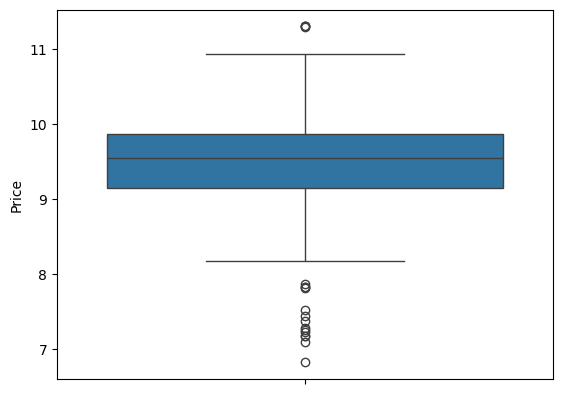

R2 Score: 0.8737388432639871
MAE: 0.010991798872582238


In [2184]:
# Ensure df is a DataFrame
df = pd.DataFrame(df)

# Check for outliers in Price
sns.boxplot(df['Price'])
plt.show()

# Optional: Apply log transformation if Price has extreme outliers
df['Price'] = np.log1p(df['Price'])  # Uncomment if necessary

# Define categorical and numerical columns
categorical_columns = ["Colour", "Processor", "Brand", "Model","Price Category","Colour_Simplified","Processor_Short"]  # Adjust as needed
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
numerical_columns.remove('Price')  # Ensure 'Price' is excluded

# Define transformations
step1 = ColumnTransformer(
    transformers=[
        ("ohe", OneHotEncoder(drop="first", sparse_output=False, handle_unknown='ignore'), categorical_columns),
        ("scaler", StandardScaler(), numerical_columns)
    ],
    remainder="passthrough"
)

# Use a more robust model
step2 = Ridge(alpha=10)

# Create pipeline
pipe = Pipeline([
    ('preprocessor', step1),
    ('model', step2)
])

# Split Data
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Evaluate Model
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

In [1956]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Train R2 Score:", r2_score(y_train, y_train_pred))
print("Test R2 Score:", r2_score(y_test, y_test_pred))

Train R2 Score: 0.9499986304987151
Test R2 Score: 0.8551214326816279


# Lasso Regression Model

In [2186]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Define categorical & numerical columns
categorical_columns = ["Colour", "Processor", "Brand", "Model", "Colour_Simplified", "Processor_Short"]
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
numerical_columns.remove('Price')  # Exclude target variable

# Data Preprocessing: Encoding categorical & scaling numerical features
step1 = ColumnTransformer([
    ("ohe", OneHotEncoder(drop="first", handle_unknown='ignore'), categorical_columns),
    ("scaler", StandardScaler(), numerical_columns)
])

# Lasso Regression Model with alpha (λ = 0.1)
lasso_model = Pipeline([
    ("preprocessor", step1),
    ("model", Lasso(alpha=0.1))
])

# Train-Test Split
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
lasso_model.set_params(model__alpha=0.001)  # Decrease regularization
lasso_model.fit(X_train, y_train)

# Predictions
y_pred = lasso_model.predict(X_test)

param_grid = {'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Evaluate Model
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


# Get feature importance (non-zero coefficients)
feature_names = step1.get_feature_names_out()
lasso_coefficients = lasso_model.named_steps['model'].coef_
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})
feature_importance = feature_importance[feature_importance['Coefficient'] != 0]  # Keep only important features

print(feature_importance.sort_values(by="Coefficient", ascending=False).head(10))

R2 Score: 0.6331999375781079
MAE: 0.0209056569354785
                         Feature  Coefficient
840  scaler__Front Camera(In MP)     0.020273
842        scaler__Mobile Height     0.017346
819   ohe__Processor_Short_Other     0.013918
839   scaler__Rear Camera(In MP)     0.011619
836               scaler__Memory     0.009925
837                  scaler__RAM     0.008997
379                 ohe__Model_2     0.006064
377              ohe__Brand_vivo     0.006030
838       scaler__mAH of Battery     0.005869
369           ohe__Brand_SAMSUNG     0.004009


In [1959]:
# Import Necessary Libraries  
import pandas as pd  
from xgboost import XGBRegressor  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.preprocessing import OneHotEncoder  
from sklearn.compose import ColumnTransformer  
from sklearn.pipeline import Pipeline  
from sklearn.metrics import mean_absolute_error, r2_score  

 
df = pd.DataFrame({  
    'Memory': [64, 64, 128, 32, 128, 256, 32, 64, 128, 128],  
    'RAM': [4, 4, 8, 2, 8, 8, 2, 4, 8, 4],  
    'mAH of Battery': [6000, 6000, 5000, 5000, 5000, 3900, 3100, 5000, 5000, 5000],  
    'Rear Camera(In MP)': [5, 5, 10, 3, 10, 10, 2, 10, 10, 10],  
    'Front Camera(In MP)': [2, 2, 7, 2, 2, 5, 1, 3, 9, 3],  
    'Processor': ['Other', 'Other', 'Qualcomm Snapdragon 680',   
                  'Mediatek Helio A22', 'G37', 'Other', 'Octa Core',   
                  'MediaTek Helio G35', 'Other', 'Mediatek Helio G35'],  
    'Brand': ['Infinix', 'Infinix', 'MOTOROLA', 'POCO', 'Infinix',   
              'SAMSUNG', 'LAVA', 'Tecno', 'SAMSUNG', 'OPPO'],  
    'Price': [7299, 7299, 11999, 5649, 8999, 79999, 5998, 9990, 38999, 15999]  
})  

# Step 3: Define Feature and Target Variables  
X = df.drop(columns=['Price'])  
y = df['Price']  

# Step 4: Define Categorical and Numerical Columns  
categorical_columns = ["Processor", "Brand"]  
numerical_columns = ['Memory', 'RAM', 'mAH of Battery', 'Rear Camera(In MP)', 'Front Camera(In MP)']  

# Step 5: Create Preprocessing Pipeline  
preprocessor = ColumnTransformer([  
    ("ohe", OneHotEncoder(drop="first", handle_unknown='ignore'), categorical_columns),  
    ("scaler", "passthrough", numerical_columns)  # Keep numerical columns as they are  
])  

# Step 6: Create XGBoost Pipeline  
xgb_pipeline = Pipeline([  
    ("preprocessor", preprocessor),  
    ("model", XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42))  
])  

# Step 7: Train-Test Split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Step 8: Hyperparameter Tuning with GridSearchCV  
param_grid = {  
    'model__max_depth': [3, 4, 5],  
    'model__learning_rate': [0.01, 0.1, 0.2],  
    'model__n_estimators': [100, 200],  
    'model__subsample': [0.8, 1.0]  
}  
grid_search = GridSearchCV(xgb_pipeline, param_grid, cv=5, scoring='r2')  
grid_search.fit(X_train, y_train)  

# Step 9: Evaluate the Best Model  
best_xgb_model = grid_search.best_estimator_  
y_pred = best_xgb_model.predict(X_test)  
# Step 10: Calculate Evaluation Metrics  
print("Best Hyperparameters:", grid_search.best_params_)  
print("R² Score:", r2_score(y_test, y_pred))  
print("MAE:", mean_absolute_error(y_test,y_pred))

Best Hyperparameters: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__subsample': 0.8}
R² Score: 0.9229046535482871
MAE: 4336.921875


# KNN Model

In [2188]:
# Step 1: Import Necessary Libraries  
import pandas as pd  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.preprocessing import OneHotEncoder, StandardScaler  
from sklearn.compose import ColumnTransformer  
from sklearn.pipeline import Pipeline  
from sklearn.metrics import mean_absolute_error, r2_score  

# Step 2: Define Feature and Target Variables  
X = df.drop(columns=['Price'])  
y = df['Price']  

# Step 3: Define Categorical and Numerical Columns  
categorical_columns = ["Processor", "Brand"]  
numerical_columns = ['Memory', 'RAM', 'mAH of Battery', 'Rear Camera(In MP)', 'Front Camera(In MP)']  

# Step 4: Create Preprocessing Pipeline  
preprocessor = ColumnTransformer([  
    ("ohe", OneHotEncoder(drop="first", handle_unknown='ignore'), categorical_columns),  
    ("scaler", StandardScaler(), numerical_columns)  # Standardizing numerical features  
])  

# Step 5: Create KNN Pipeline  
knn_pipeline = Pipeline([  
    ("preprocessor", preprocessor),  
    ("model", KNeighborsRegressor())  
])  

# Step 6: Train-Test Split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Step 7: Hyperparameter Tuning with GridSearchCV  
param_grid = {  
    'model__n_neighbors': [2, 3, 5, 7, 10],  
    'model__weights': ['uniform', 'distance'],  
    'model__p': [1, 2]  # 1 = Manhattan distance, 2 = Euclidean distance  
}  

grid_search = GridSearchCV(  
    knn_pipeline,   
    param_grid,   
    cv=5,   
    scoring='r2',   
    n_jobs=-1  
)  

grid_search.fit(X_train, y_train)  

# Step 8: Evaluate the Best Model  
best_knn_model = grid_search.best_estimator_  
y_pred = best_knn_model.predict(X_test)  

# Step 9: Print Results  
print("Best Hyperparameters:", grid_search.best_params_)  
print("R² Score:", r2_score(y_test, y_pred))  
print("MAE:", mean_absolute_error(y_test, y_pred))  


Best Hyperparameters: {'model__n_neighbors': 3, 'model__p': 1, 'model__weights': 'distance'}
R² Score: 0.9087453332103054
MAE: 0.006167463312673884


# SVM Model

In [2194]:
# Step 1: Import Necessary Libraries  
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.svm import SVR  
from sklearn.preprocessing import OneHotEncoder, StandardScaler  
from sklearn.compose import ColumnTransformer  
from sklearn.pipeline import Pipeline  
from sklearn.metrics import mean_absolute_error, r2_score  
from sklearn.ensemble import RandomForestRegressor

# Step 2: Define Feature and Target Variables  
X = df.drop(columns=['Price'])  
y = df['Price']  

y = np.log1p(df['Price'])  # Log transformation


# Step 3: Define Categorical and Numerical Columns  
categorical_columns = ["Processor", "Brand"]  
numerical_columns = ['Memory', 'RAM', 'mAH of Battery', 'Rear Camera(In MP)', 'Front Camera(In MP)']  

# Step 4: Create Preprocessing Pipeline  
preprocessor = ColumnTransformer([  
    ("ohe", OneHotEncoder(drop="first", handle_unknown='ignore'), categorical_columns),  
    ("scaler", StandardScaler(), numerical_columns)  # Standardizing numerical features  
])  

# Step 5: Create SVR Pipeline  


rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])


# Step 6: Train-Test Split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Step 7: Hyperparameter Tuning with GridSearchCV  
param_grid = {  
    'model__C': [1, 10, 100, 1000],  # Try larger values  
    'model__epsilon': [0.01, 0.1, 0.5, 1],  
    'model__kernel': ['rbf', 'poly']  
}  
grid_search = GridSearchCV(  
    svr_pipeline,   
    param_grid,   
    cv=5,   
    scoring='r2',   
    n_jobs=-1  
)  

grid_search.fit(X_train, y_train)  

# Step 8: Evaluate the Best Model  
best_svr_model = grid_search.best_estimator_  
y_pred = best_svr_model.predict(X_test)  

# Step 9: Print Results  
print("Best Hyperparameters:", grid_search.best_params_)  
print("R² Score:", r2_score(y_test, y_pred))  
print("MAE:", mean_absolute_error(y_test, y_pred))  
y_pred = np.expm1(best_svr_model.predict(X_test))  # Reverse log transformation if applied



Best Hyperparameters: {'model__C': 1, 'model__epsilon': 0.01, 'model__kernel': 'rbf'}
R² Score: 0.8072958259578983
MAE: 0.005354011785358394


# Feature Importance using Random Forest / XGBoost

In [2196]:
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])


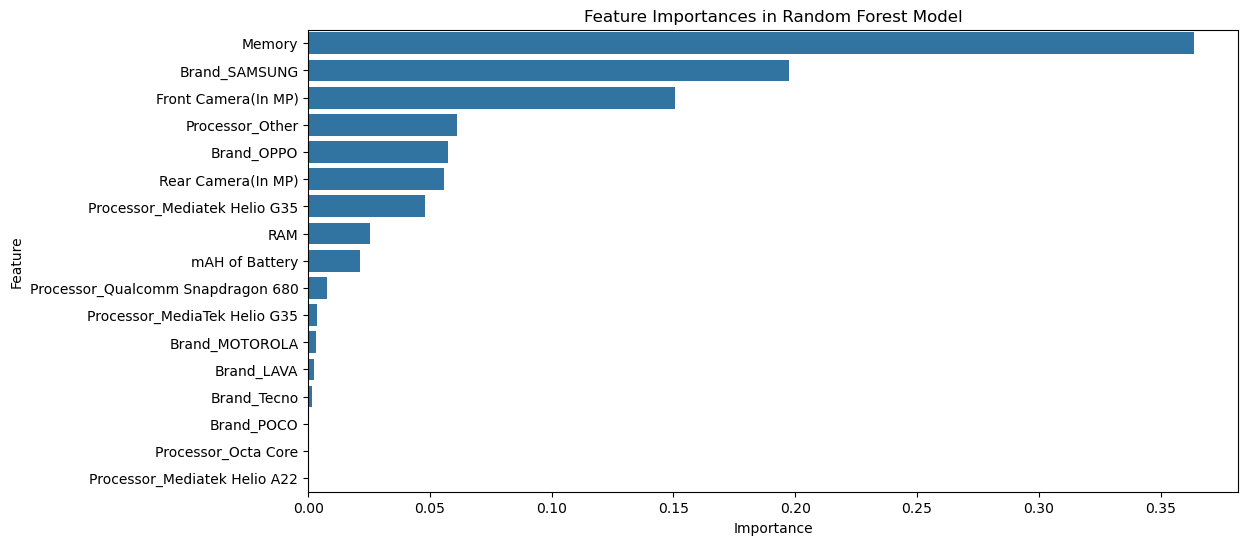

                              Feature  Importance
12                             Memory    0.363673
10                      Brand_SAMSUNG    0.197397
16                Front Camera(In MP)    0.150641
4                     Processor_Other    0.061105
8                          Brand_OPPO    0.057367
15                 Rear Camera(In MP)    0.055706
2        Processor_Mediatek Helio G35    0.047938
13                                RAM    0.025360
14                     mAH of Battery    0.021323
5   Processor_Qualcomm Snapdragon 680    0.007883
0        Processor_MediaTek Helio G35    0.003581
7                      Brand_MOTOROLA    0.003145
6                          Brand_LAVA    0.002433
11                        Brand_Tecno    0.001685
9                          Brand_POCO    0.000280
3                 Processor_Octa Core    0.000275
1        Processor_Mediatek Helio A22    0.000208


In [2198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Sample DataFrame
df = pd.DataFrame({
    'Memory': [64, 64, 128, 32, 128, 256, 32, 64, 128, 128],  
    'RAM': [4, 4, 8, 2, 8, 8, 2, 4, 8, 4],  
    'mAH of Battery': [6000, 6000, 5000, 5000, 5000, 3900, 3100, 5000, 5000, 5000],  
    'Rear Camera(In MP)': [5, 5, 10, 3, 10, 10, 2, 10, 10, 10],  
    'Front Camera(In MP)': [2, 2, 7, 2, 2, 5, 1, 3, 9, 3],  
    'Processor': ['Other', 'Other', 'Qualcomm Snapdragon 680',   
                  'Mediatek Helio A22', 'G37', 'Other', 'Octa Core',   
                  'MediaTek Helio G35', 'Other', 'Mediatek Helio G35'],  
    'Brand': ['Infinix', 'Infinix', 'MOTOROLA', 'POCO', 'Infinix',   
              'SAMSUNG', 'LAVA', 'Tecno', 'SAMSUNG', 'OPPO'],  
    'Price': [7299, 7299, 11999, 5649, 8999, 79999, 5998, 9990, 38999, 15999]  
})  

# Step 1: Define Features and Target
X = df.drop(columns=['Price'])  
y = df['Price']  

# Step 2: Define Categorical & Numerical Columns
categorical_columns = ["Processor", "Brand"]  
numerical_columns = ['Memory', 'RAM', 'mAH of Battery', 'Rear Camera(In MP)', 'Front Camera(In MP)']  

# Step 3: Create Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ("ohe", OneHotEncoder(drop="first", handle_unknown='ignore'), categorical_columns),
    ("scaler", "passthrough", numerical_columns)  # Keep numerical columns unchanged
])

# Step 4: Create the Random Forest Pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Pipeline
pipeline.fit(X_train, y_train)

# Step 7: Extract Feature Importances
feature_importances = pipeline.named_steps['model'].feature_importances_

# Step 8: Get Transformed Feature Names & Clean Names
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
feature_names = [name.replace("ohe__", "").replace("scaler__", "") for name in feature_names]

# Step 9: Create a DataFrame for Visualization
features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by="Importance", ascending=False)

# Step 10: Plot Feature Importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y="Feature", data=features_df)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display Feature Importance Table
print(features_df)


# RECOMMENDATIONS

# Memory (Storage Capacity)-->High	Higher storage models (128GB, 256GB) command a premium. Offer multiple storage variants to cater to different customer segments.
